# Pepper Spiciness Prediction

Group 12: Le Uyen Nhu Dinh, Sheikh Hasan Elahi, Isma Sohail

In [65]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from matplotlib.cm import get_cmap
from matplotlib.colors import Normalize

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder,StandardScaler, FunctionTransformer, OneHotEncoder, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score, classification_report, r2_score, mean_absolute_error
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, ElasticNet, RANSACRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier
from sklearn.cross_decomposition import PLSRegression


### Reading data

In [66]:
df = pd.read_csv('train.csv')
df

Length (cm)  Width (cm)  Weight (g)  Pericarp Thickness (mm)  Seed Count  \
0          17.37        5.42       94.30                     4.90      193.93   
1          27.78        4.75      262.71                     6.56      186.29   
2           6.17        3.51       66.72                     7.96      298.81   
3           6.12        6.07       51.24                     4.57       39.36   
4          28.58        4.84      166.51                     3.07      194.07   
..           ...         ...         ...                      ...         ...   
995         8.67        6.51       19.00                     2.87        1.53   
996        17.17        9.25      150.86                     1.41      386.87   
997        14.16        6.87      124.72                     1.97      202.83   
998         3.71        7.12       29.53                     1.05      115.61   
999        14.33        8.99      179.04                     4.19      344.16   

     Capsaicin Content  Vitamin C Content (mg)  Sugar Content  \
0                 3.21                  173.59           6.15   
1                 8.19                  100.41           2.36   
2                 4.69                  125.91           6.75   
3                 2.76                  143.54           5.93   
4                 7.01                  193.76           2.85   
..                 ...                     ...            ...   
995               0.63                    9.02           0.63   
996               2.27                  268.93           2.21   
997               3.31                  203.84           2.90   
998               9.80                   45.95           2.39   
999               2.65                  164.35           1.11   

     Moisture Content  Firmness   color Harvest Time  \
0               88.59      3.40     red       Midday   
1              111.20      5.45   green       Midday   
2               72.98      2.77     red       Midday   
3               63.93      1.62  yellow       Midday   
4               88.19      3.99     red       Midday   
..                ...       ...     ...          ...   
995             95.54      4.86  yellow      Evening   
996            131.71      2.59  yellow      Morning   
997            114.42      3.17  yellow      Evening   
998             97.70      4.01   green      Evening   
999             80.82      2.95   green      Evening   

     Average Daily Temperature During Growth (celcius)  \
0                                                 8.68   
1                                                22.44   
2                                                24.99   
3                                                13.05   
4                                                27.08   
..                                                 ...   
995                                              16.57   
996                                              22.39   
997                                              15.84   
998                                              16.05   
999                                              22.88   

    Average Temperature During Storage (celcius)  Scoville Heat Units (SHU)  
0                                            5-6                       0.00  
1                                            NaN                       0.00  
2                                            NaN                  455995.06  
3                                            NaN                       0.00  
4                                            NaN                       0.00  
..                                           ...                        ...  
995                                          NaN                   88266.90  
996                                          NaN                       0.00  
997                                          7-8                       0.00  
998                                          NaN                  188390.86  
999                    

In [67]:
# Categorical data
df.select_dtypes(include='object')

color Harvest Time Average Temperature During Storage (celcius)
0       red       Midday                                          5-6
1     green       Midday                                          NaN
2       red       Midday                                          NaN
3    yellow       Midday                                          NaN
4       red       Midday                                          NaN
..      ...          ...                                          ...
995  yellow      Evening                                          NaN
996  yellow      Morning                                          NaN
997  yellow      Evening                                          7-8
998   green      Evening                                          NaN
999   green      Evening                                          NaN

[1000 rows x 3 columns]

In [68]:
# Statistical summary on nummeric data
df.describe()

Length (cm)  Width (cm)  Weight (g)  Pericarp Thickness (mm)  \
count   999.000000  999.000000  999.000000               998.000000   
mean     15.574675    6.641572  169.346406                 4.619499   
std       6.267303    2.139023  123.779026                 2.829503   
min       0.300000    0.100000    0.560000                 0.000000   
25%      11.290000    5.140000   79.020000                 2.400000   
50%      15.520000    6.600000  147.230000                 4.280000   
75%      19.900000    8.045000  227.625000                 6.560000   
max      35.570000   13.620000  869.970000                14.630000   

       Seed Count  Capsaicin Content  Vitamin C Content (mg)  Sugar Content  \
count  999.000000         999.000000             1000.000000     999.000000   
mean   128.731301           4.215385              142.035180       3.283534   
std     87.270366           3.163125               72.246142       1.938264   
min      0.040000           0.010000                0.950000       0.010000   
25%     55.390000           1.710000               92.290000       1.865000   
50%    119.490000           3.590000              141.730000       3.140000   
75%    186.845000           6.115000              192.720000       4.555000   
max    487.260000          19.020000              450.290000       9.360000   

       Moisture Content    Firmness  \
count       1000.000000  999.000000   
mean          90.878380    3.679179   
std           18.724314    1.034726   
min           31.400000    0.850000   
25%           78.585000    2.980000   
50%           89.690000    3.660000   
75%          103.200000    4.375000   
max          158.300000    8.250000   

       Average Daily Temperature During Growth (celcius)  \
count                                        1000.000000   
mean                                           19.641960   
std                                             6.436255   
min                                             0.840000   
25%                                            15.397500   
50%                                            19.495000   
75%                                            23.530000   
max                                            40.700000   

       Scoville Heat Units (SHU)  
count                1000.000000  
mean                70941.260020  
std                108149.917069  
min                     0.000000  
25%                     0.000000  
50%                     0.000000  
75%                121349.617500  
max                527639.860000

In [69]:
# Statistical summary on categoric data
df.describe(include=['O'])

color Harvest Time Average Temperature During Storage (celcius)
count      999         1000                                          352
unique       3            3                                            6
top     yellow       Midday                                          7-8
freq       351          605                                           93

In [70]:
# Check missing data
df.isna().sum()

Length (cm)                                            1
Width (cm)                                             1
Weight (g)                                             1
Pericarp Thickness (mm)                                2
Seed Count                                             1
Capsaicin Content                                      1
Vitamin C Content (mg)                                 0
Sugar Content                                          1
Moisture Content                                       0
Firmness                                               1
color                                                  1
Harvest Time                                           0
Average Daily Temperature During Growth (celcius)      0
Average Temperature During Storage (celcius)         648
Scoville Heat Units (SHU)                              0
dtype: int64

**Comment**: Most of the features have 1 to 2 missing values while 'Average Temperature During Storage (celcius)' has 648 missing, while train data have 1000 samples totally. This amount is quite significant, which could be better to remove the feature.

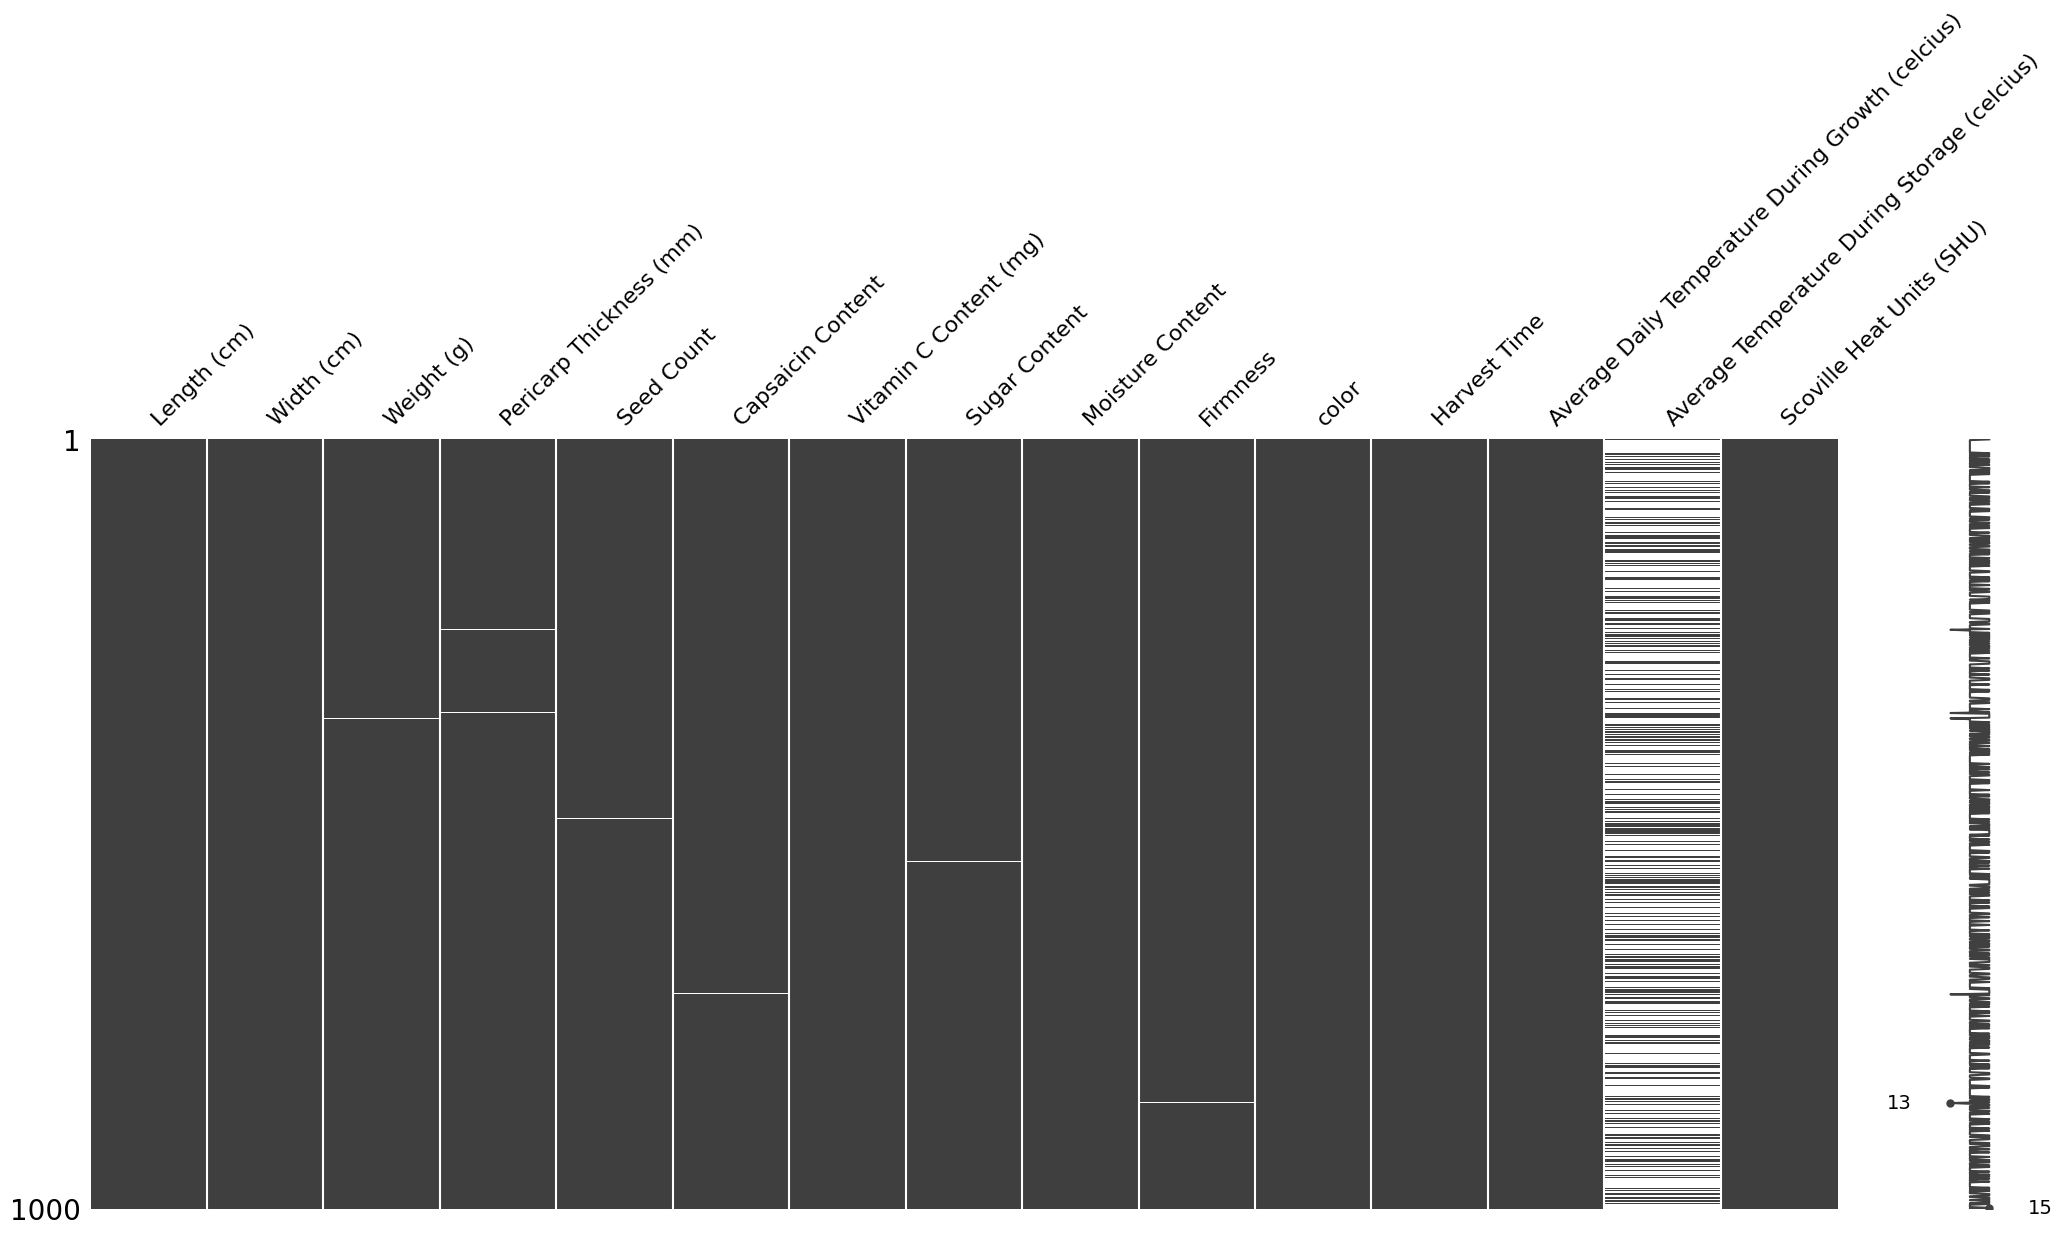

In [71]:
# Check location of the missing values:
import missingno as msno
msno.matrix(df)
plt.show()

In [72]:
# Check duplicates:
df.duplicated().any()

np.False_

/var/folders/tb/4p7pqq7j23n681mj_tfj2wl40000gn/T/ipykernel_24293/435218730.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('RdYlGn_r', num_bins)


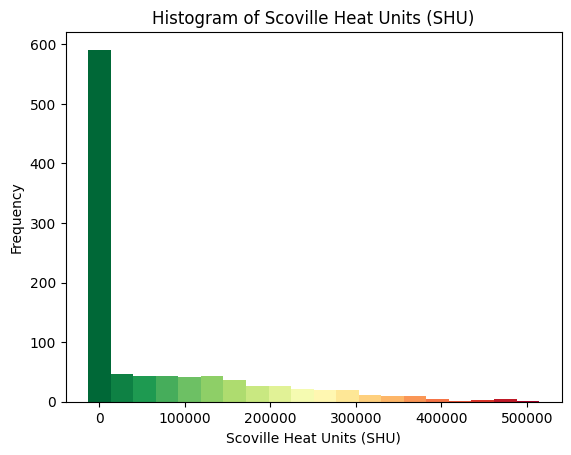

In [73]:
# Distribution of target:

# Histogram data
num_bins = 20
counts, bins = np.histogram(df['Scoville Heat Units (SHU)'], bins=num_bins)

# Colormap from green to red
cmap = get_cmap('RdYlGn_r', num_bins)

# Plot histogram with colored bins
for i in range(num_bins):
    plt.bar(bins[i], counts[i], width=bins[i+1]-bins[i], color=cmap(i))

plt.title("Histogram of Scoville Heat Units (SHU)")
plt.xlabel("Scoville Heat Units (SHU)")
plt.ylabel("Frequency")
plt.show()

**Comment**: Almost 600 samples have 0 as Scoville Heat Score, and the rest of 400 samples are distributes quite evenly to other values. The higher the values the fewer samples are found.

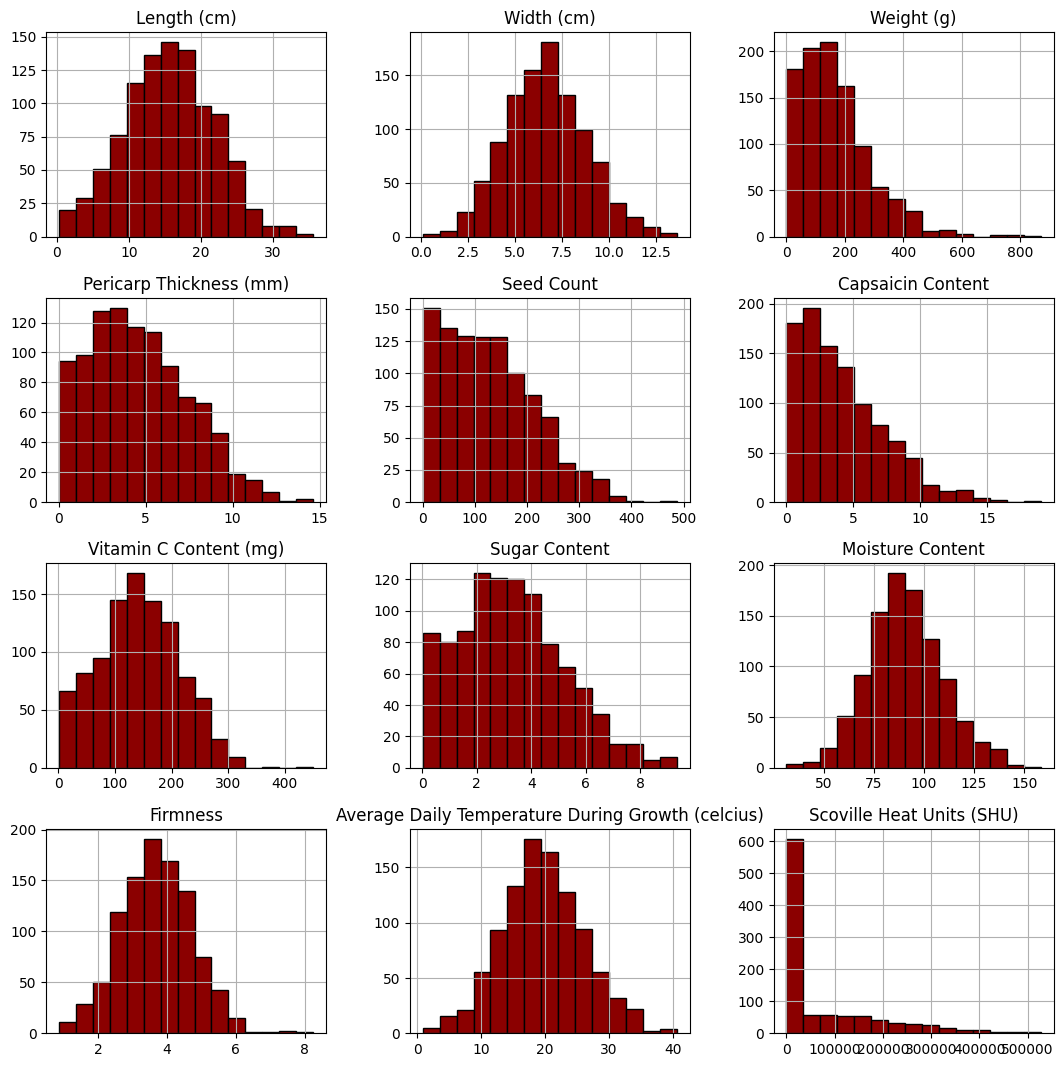

In [74]:
# Histograms of features:
df.hist(figsize=(13,13), 
        bins = 15, color = 'darkred',
        edgecolor='black')

plt.show()

**Comment**: The five features that show Guassian distribution are 'Length', 'Width', 'Moisture Content', 'Firmness' and 'Average Daily Temperature During Growth'. The rest are skewed to the left. 

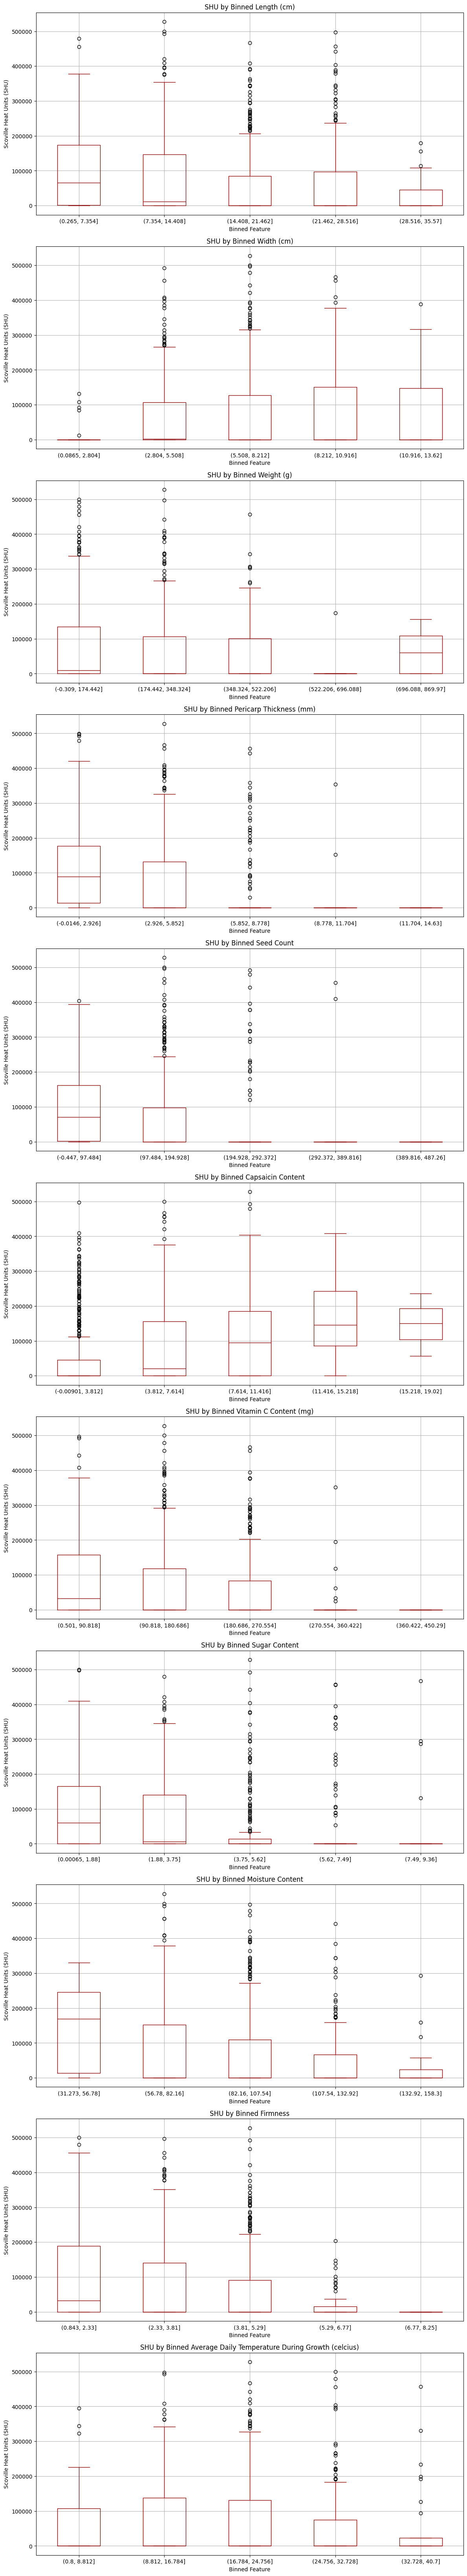

In [75]:

# Get numeric features (excluding target)
features = df.select_dtypes(include='number').columns.drop('Scoville Heat Units (SHU)')

# Setup subplots
fig, axes = plt.subplots(nrows=len(features), figsize=(12, 6 * len(features)))

# If only one axis, make it iterable
if len(features) == 1:
    axes = [axes]

# Plot boxplots
for i, feature in enumerate(features):
    # Bin the feature
    df['feature_bin'] = pd.cut(df[feature], bins=5)

    # Create boxplot on the subplot axis
    df.boxplot(column='Scoville Heat Units (SHU)', by='feature_bin', ax=axes[i], color = 'darkred')
    axes[i].set_title(f'SHU by Binned {feature}')
    axes[i].set_xlabel('Binned Feature')
    axes[i].set_ylabel('Scoville Heat Units (SHU)')

# Final layout
plt.tight_layout()
plt.suptitle('')
plt.show()

**Comment**: It is uneasy to detect outliers from the dataset because nearly 60% has value of 0 and the remaining sample with higher Scoville Heat Units can be useful for the machine to learn the 'specical'/'real spicy' cases.

/var/folders/tb/4p7pqq7j23n681mj_tfj2wl40000gn/T/ipykernel_24293/3171844941.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('RdYlGn_r')  # Green (low) to Red (high)


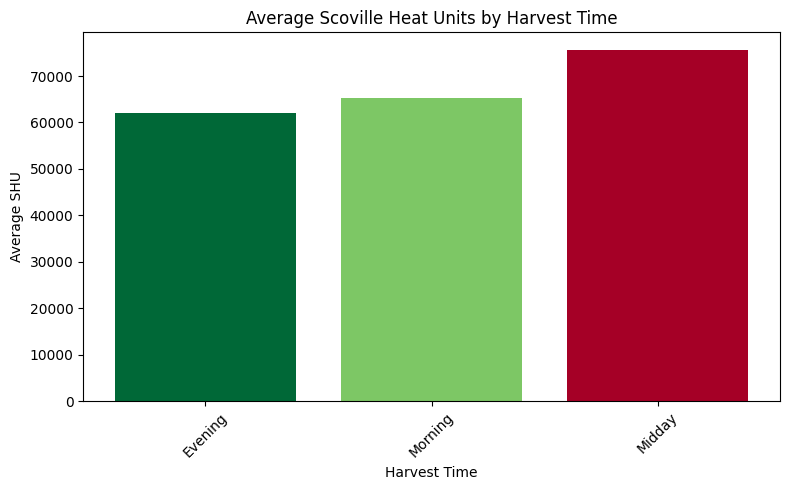

In [76]:
group1 = df.groupby('Harvest Time')['Scoville Heat Units (SHU)'].mean().sort_values()

# Normalize the SHU values for color mapping
norm1 = Normalize(vmin=group1.min(), vmax=group1.max())
cmap = get_cmap('RdYlGn_r')  # Green (low) to Red (high)
colors1 = [cmap(norm1(val)) for val in group1.values]

# Plot
plt.figure(figsize=(8, 5))
plt.bar(group1.index, group1.values, color=colors1)
plt.xlabel('Harvest Time')
plt.ylabel('Average SHU')
plt.title('Average Scoville Heat Units by Harvest Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Comment**: If the chili is harvest during the midday, it is most probably spicier than others.

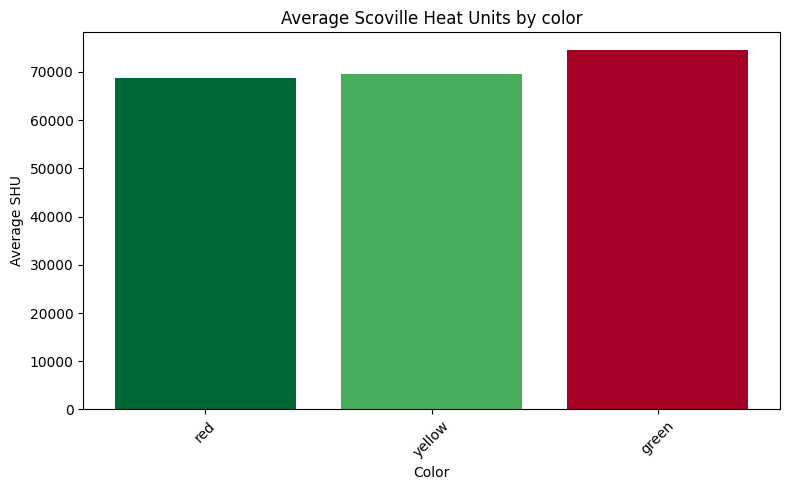

In [77]:
group2 = df.groupby('color')['Scoville Heat Units (SHU)'].mean().sort_values()

# Normalize the SHU values for color mapping
norm2 = Normalize(vmin=group2.min(), vmax=group2.max())
colors2 = [cmap(norm2(val)) for val in group2.values]

# Plot
plt.figure(figsize=(8, 5))
plt.bar(group2.index, group2.values, color=colors2)
plt.xlabel('Color')
plt.ylabel('Average SHU')
plt.title('Average Scoville Heat Units by color')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Comment**: It is hard to distinguish the spiciness by colors of red and yellow but the green ones are most probably spicier.

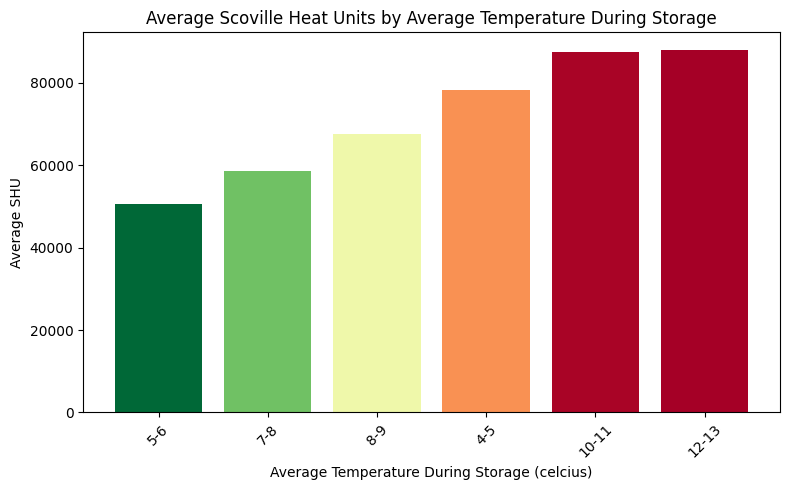

In [78]:
group3 = df.groupby('Average Temperature During Storage (celcius)')['Scoville Heat Units (SHU)'].mean().sort_values()

# Normalize the SHU values for color mapping
norm3 = Normalize(vmin=group3.min(), vmax=group3.max())
colors3 = [cmap(norm3(val)) for val in group3.values]

# Plot
plt.figure(figsize=(8, 5))
plt.bar(group3.index, group3.values, color=colors3)
plt.xlabel('Average Temperature During Storage (celcius)')
plt.ylabel('Average SHU')
plt.title('Average Scoville Heat Units by Average Temperature During Storage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Comment**: The higher temperature the pepper are stored, the spicier they are.

In [79]:
# Check if the values of 'Average Temperature During Storage' are following order for imputation
for val in df['Average Temperature During Storage (celcius)']:
    print(val)

5-6
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
12-13
nan
7-8
nan
10-11
nan
nan
nan
10-11
nan
7-8
nan
5-6
nan
nan
8-9
nan
nan
nan
8-9
8-9
7-8
nan
5-6
nan
8-9
nan
5-6
nan
nan
nan
nan
nan
nan
nan
nan
nan
4-5
nan
10-11
nan
nan
nan
nan
7-8
nan
nan
nan
8-9
4-5
nan
5-6
nan
nan
nan
nan
12-13
7-8
nan
10-11
nan
nan
7-8
7-8
nan
nan
4-5
nan
nan
nan
nan
nan
12-13
8-9
nan
5-6
nan
nan
nan
nan
nan
nan
nan
5-6
7-8
nan
7-8
nan
nan
nan
7-8
8-9
nan
nan
5-6
nan
nan
8-9
nan
nan
nan
nan
nan
8-9
nan
nan
nan
8-9
12-13
5-6
nan
12-13
nan
nan
8-9
nan
8-9
7-8
nan
nan
5-6
7-8
nan
nan
nan
10-11
7-8
5-6
10-11
12-13
nan
8-9
nan
nan
nan
nan
8-9
nan
nan
10-11
nan
12-13
nan
5-6
nan
nan
7-8
nan
nan
nan
nan
nan
nan
12-13
5-6
nan
nan
nan
nan
nan
nan
4-5
nan
12-13
8-9
nan
8-9
nan
nan
nan
nan
4-5
nan
nan
nan
nan
5-6
nan
nan
7-8
5-6
nan
nan
nan
nan
nan
10-11
4-5
10-11
10-11
nan
4-5
7-8
nan
7-8
nan
nan
nan
nan
nan
nan
nan
nan
nan
12-13
7-8
nan
10-11
12-13
nan
nan
nan
nan
nan
nan
8-9
8-9
8-9
8-9
nan
nan


**Comment**: It seems that the values of this feature is not following any order, which is so hard to impute missing values properly even though it could be potensial useful.

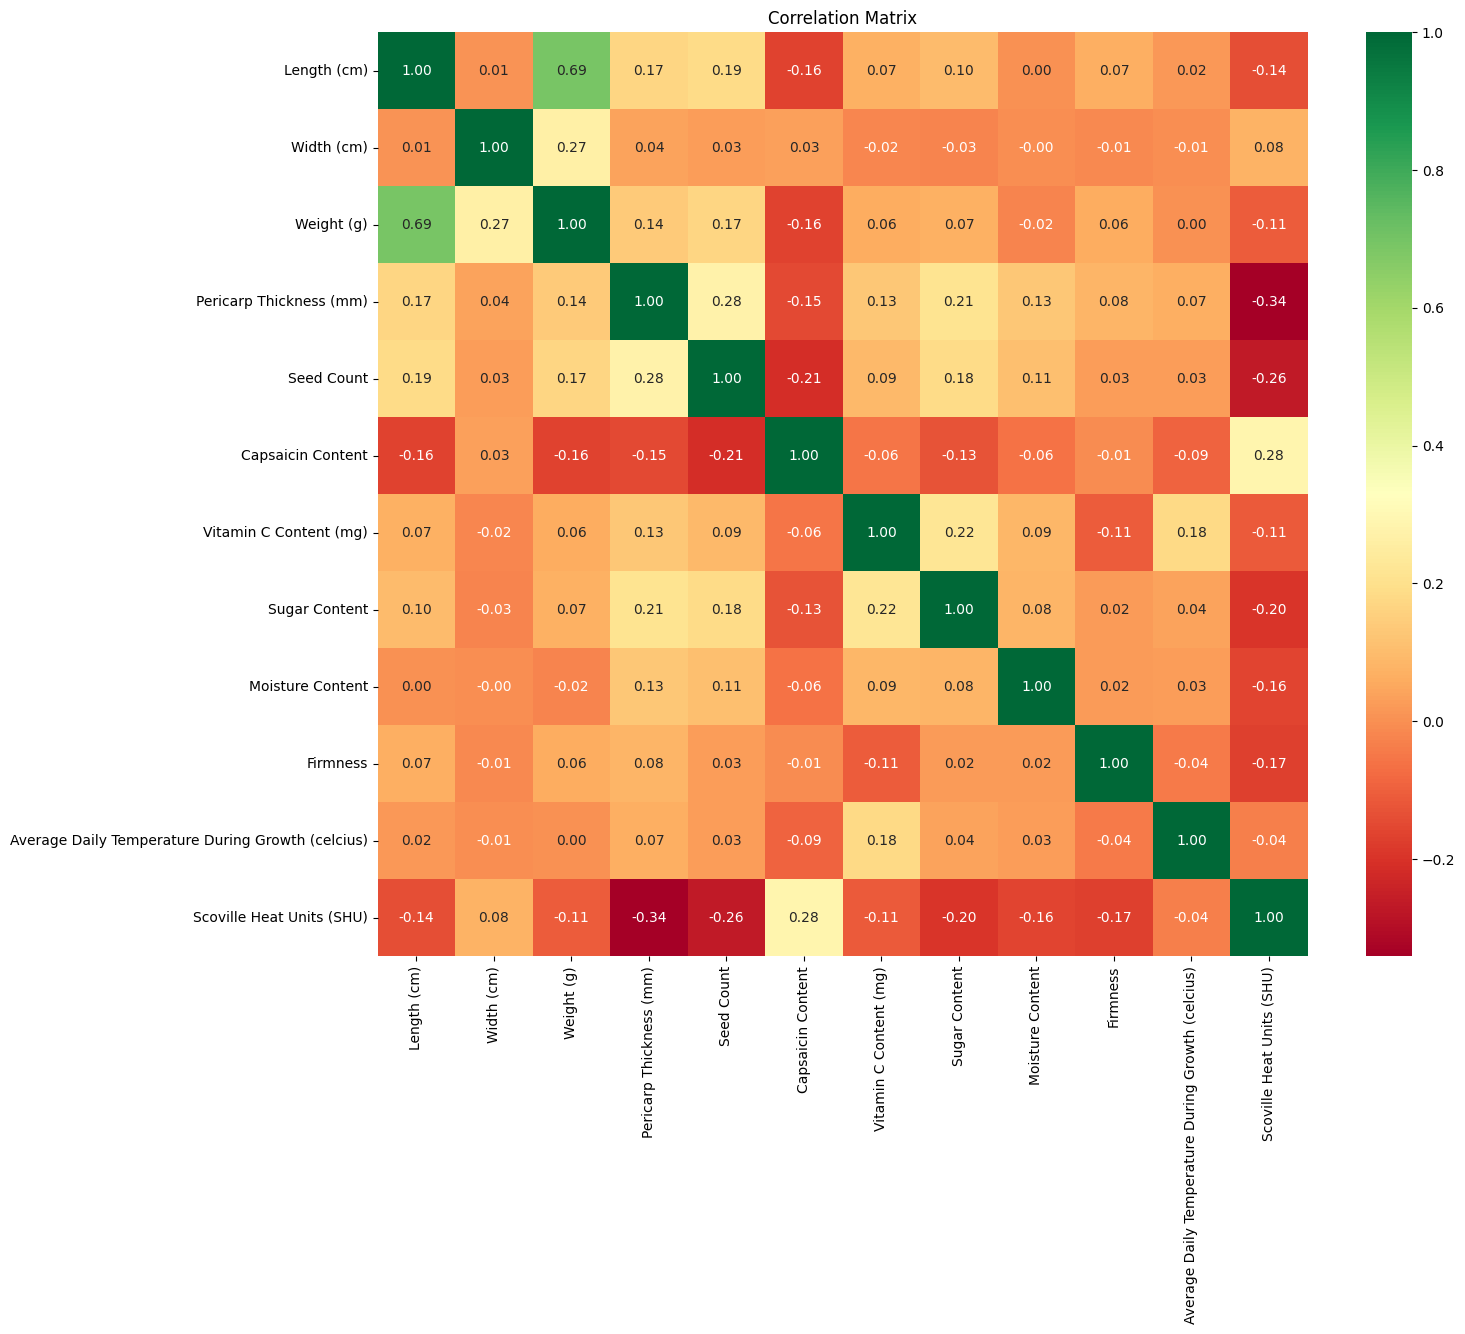

In [80]:
# Correlation matrix
plt.figure(figsize=(15, 12))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='RdYlGn', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [81]:
# Preprocessing for using Regressor to extract feature importance:
df1 = df.copy()

# Drop columns:
cols_to_drop = ['feature_bin']
df1.drop(columns=cols_to_drop, inplace=True, errors='ignore')

# Handle missing values: Fill numeric columns with median, categorical with mode
for col in df1.columns:
    if df1[col].dtype == 'object' or df1[col].dtype.name == 'category':
        # Fill categorical with mode
        df1[col].fillna(df1[col].mode()[0])
    else:
        # Fill numeric with median
        df1[col] = df1[col].fillna(df1[col].median())


# Encode categorical features:
le_color = LabelEncoder()
le_harvest = LabelEncoder()
le_storage = LabelEncoder()

df1['color'] = le_color.fit_transform(df1['color'])
df1['Harvest Time'] = le_harvest.fit_transform(df1['Harvest Time'])
df1['Average Temperature During Storage (celcius)'] = le_storage.fit_transform(df1['Average Temperature During Storage (celcius)'])


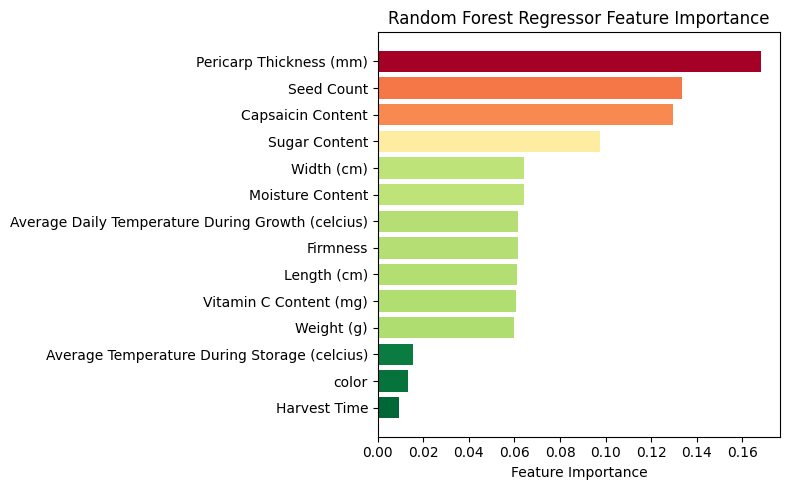

In [82]:
# Study feature importance:

# Split features and target
X = df1.drop('Scoville Heat Units (SHU)', axis=1)
y = df['Scoville Heat Units (SHU)']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Assume model and feature_names are already defined
importances = model.feature_importances_
feature_names = X.columns
sorted_idx = np.argsort(importances)

# Normalize importances for coloring
norm = Normalize(vmin=importances.min(), vmax=importances.max())
colors = [cmap(norm(val)) for val in importances[sorted_idx]]

# Plot
plt.figure(figsize=(8, 5))
plt.barh(feature_names[sorted_idx], importances[sorted_idx], color=colors)
plt.xlabel("Feature Importance")
plt.title("Random Forest Regressor Feature Importance")
plt.tight_layout()
plt.show()

**Comment**: 

The top 4 are 'Pericarp Thickness', 'Seed Count', Capsaicin Content', and 'Sugar Content'. 

The three categorical features are the least importance. 

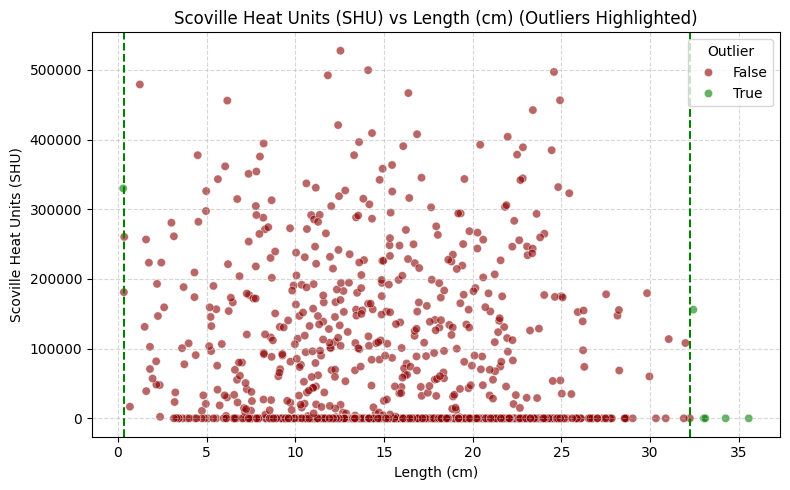

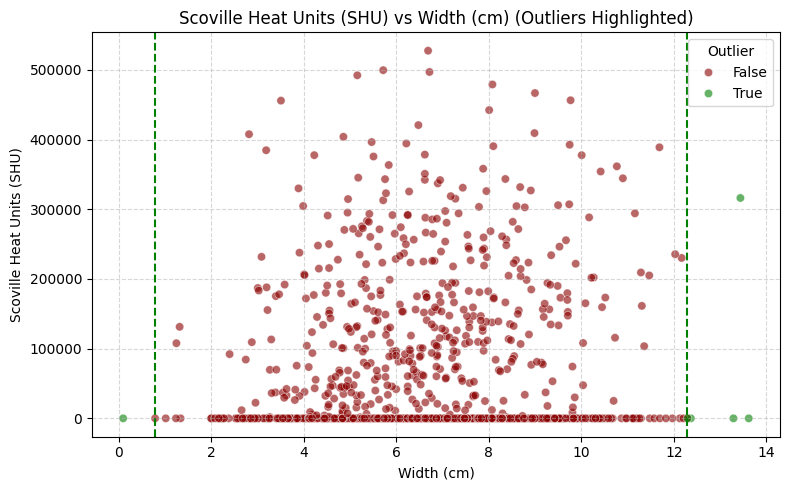

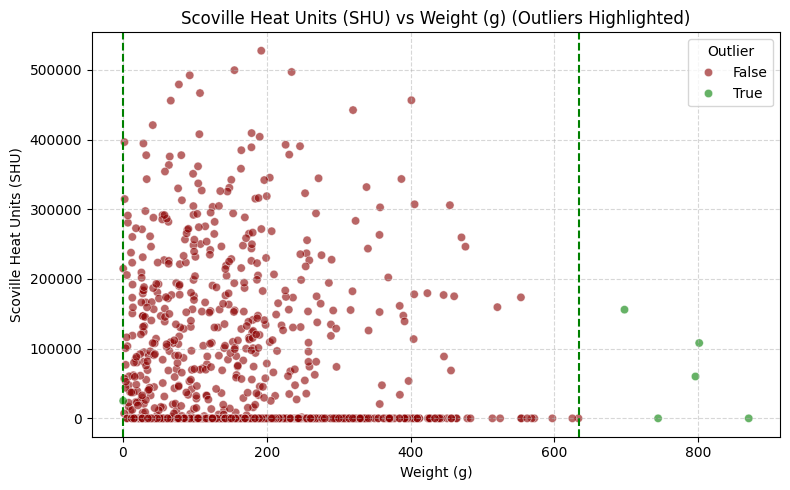

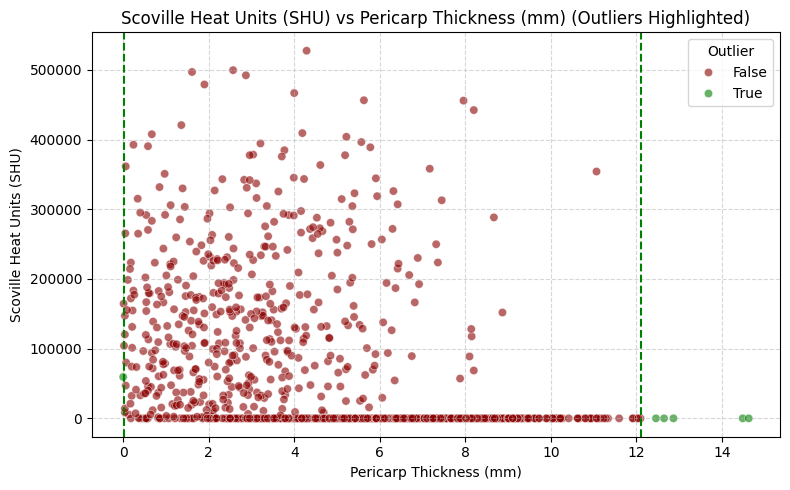

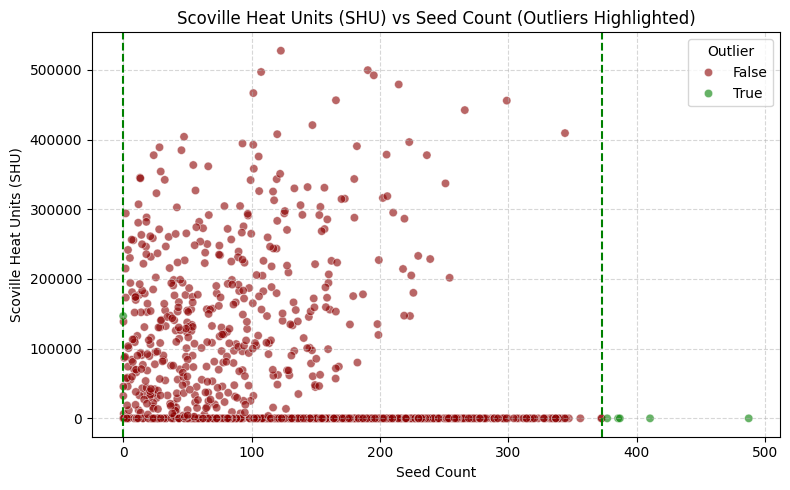

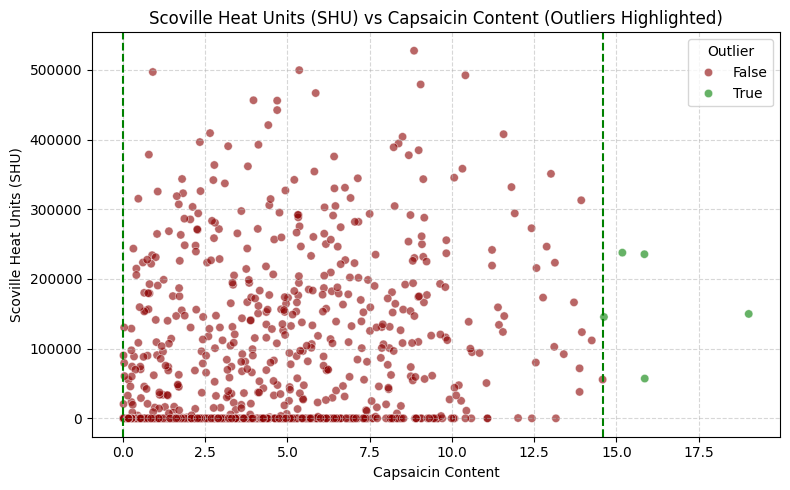

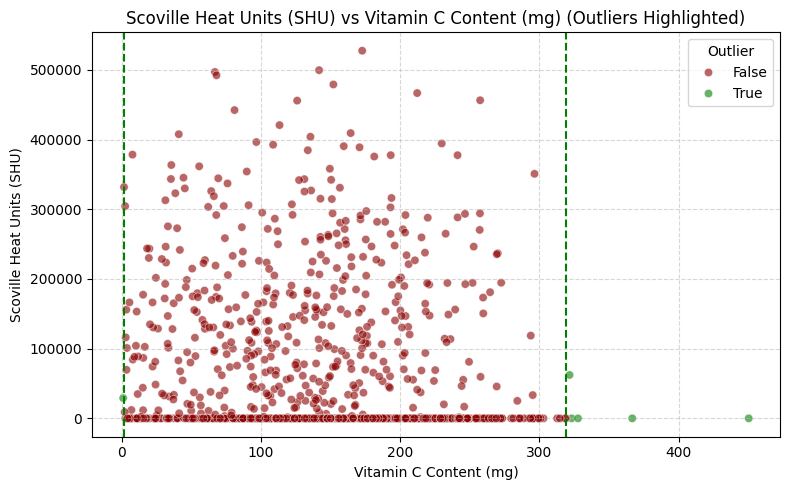

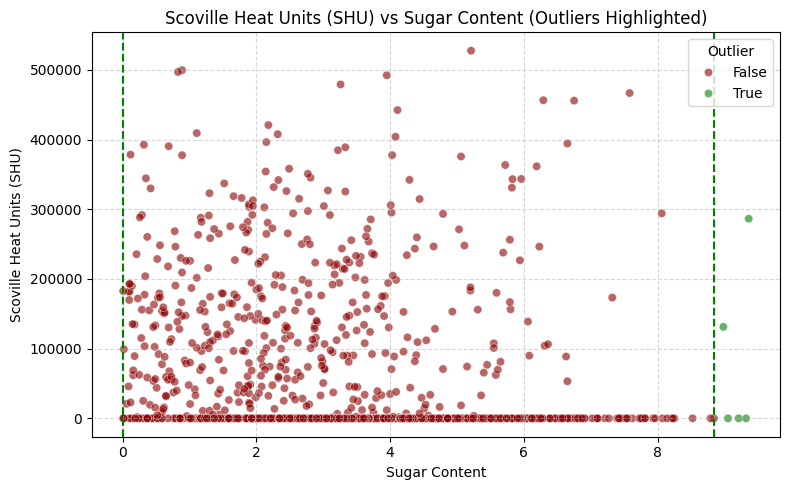

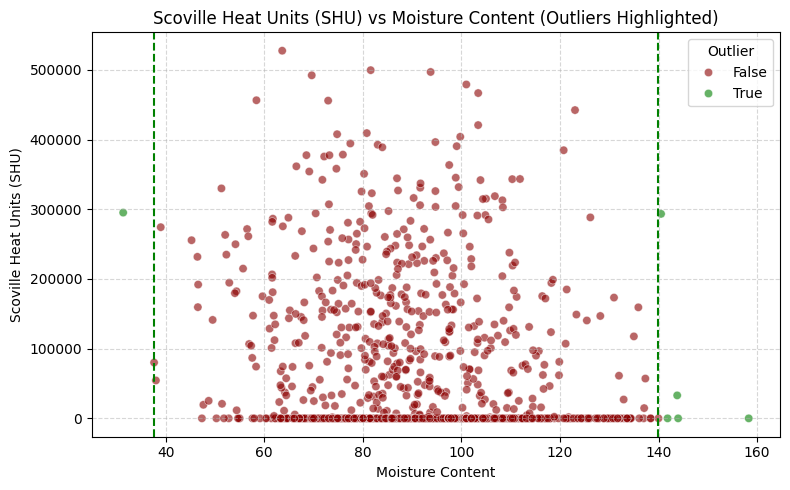

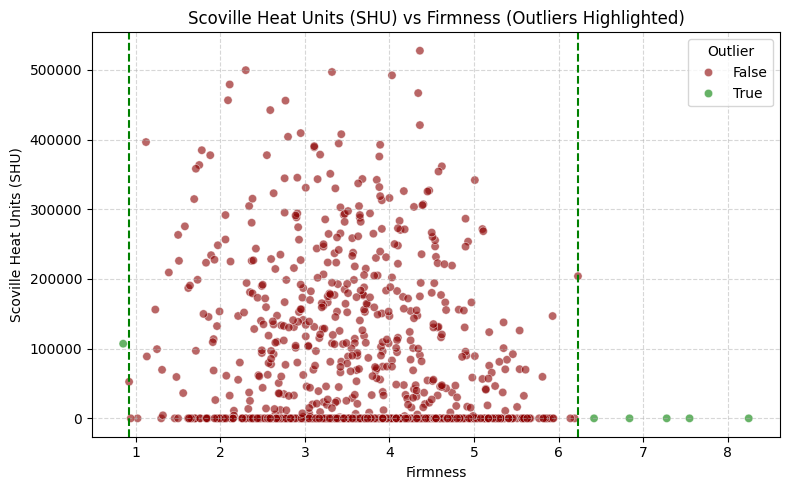

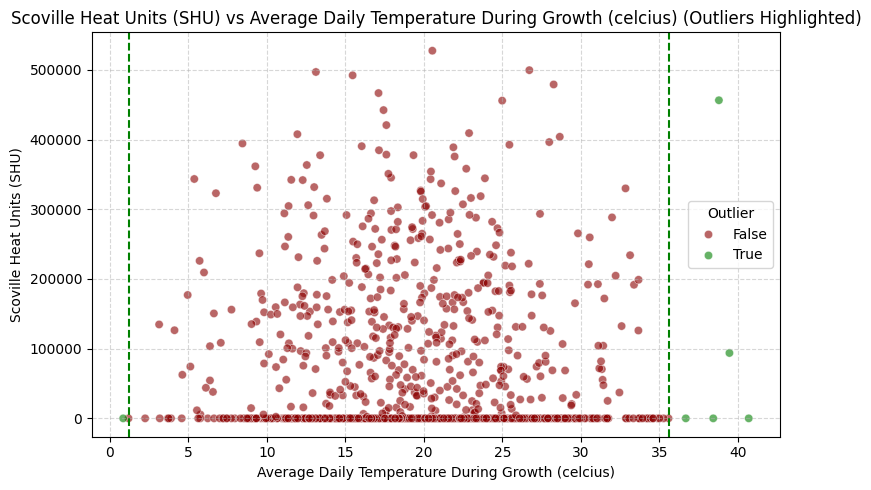

In [83]:
target_col = 'Scoville Heat Units (SHU)'

for col in df.select_dtypes(include='number').columns:
    if col != target_col:
        q99 = df[col].quantile(0.995)
        q01 = df[col].quantile(0.001)

        # Create an "Outlier" label
        df['Outlier'] = (df[col] > q99) | (df[col] < q01)

        plt.figure(figsize=(8, 5))
        sns.scatterplot(
            data=df,
            x=col,
            y=target_col,
            hue='Outlier',
            palette={False: 'darkred', True: 'green'},
            alpha=0.6
        )
        
        plt.axvline(q99, color='green', linestyle='--')
        plt.axvline(q01, color='green', linestyle='--')
        plt.title(f'{target_col} vs {col} (Outliers Highlighted)')
        plt.xlabel(col)
        plt.ylabel(target_col)
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.tight_layout()
        plt.show()

**For preprocessing**:

- Impute missing values with median of the feature because there are just 1 or 2 missing samples in the remaining feature.

- Remove outliers: below quantile(0.001) and above quantile(0.995) for each feature

--- For both test and train data ---

- Standardizing

- Drop three categorical features: 'Average Temperature During Storage (celsius)' because it has so many missing values.

# PREPROCESSING

In [84]:
# Reimport the data
df_cleaned = pd.read_csv('train.csv')

num_features = df_cleaned.select_dtypes(include='number').drop('Scoville Heat Units (SHU)', axis = 1).columns

for col in num_features:
    # Impute missing values with median
    df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].median())
    
    # Remove outliers
    q99 = df_cleaned[col].quantile(0.995)
    q01 = df_cleaned[col].quantile(0.001)

    # Filter rows — keep only values within the quantile range
    df_cleaned = df_cleaned[(df_cleaned[col] <= q99) & (df_cleaned[col] >= q01)]
    


In [85]:
DROP_COLS = ['color', 'Harvest Time', 'Average Temperature During Storage (celcius)']
drop_columns = FunctionTransformer(lambda df: df.drop(columns=DROP_COLS, axis = 1))

# Preprocessing pipeline
preprocessor = Pipeline([
    ('drop_cols', drop_columns),
    ('scaler', StandardScaler())
])

In [86]:
X = df_cleaned.drop(columns=[target_col])
y = df_cleaned[target_col]

X_preprocessed = preprocessor.fit_transform(X)

preprocessed_df = pd.DataFrame(
    X_preprocessed,
    index=X.index,
    columns=[col for col in X.columns if col not in DROP_COLS]
)

preprocessed_df['Scoville Heat Units (SHU)'] = y

## VISUALIZATION AFTER CLEANING

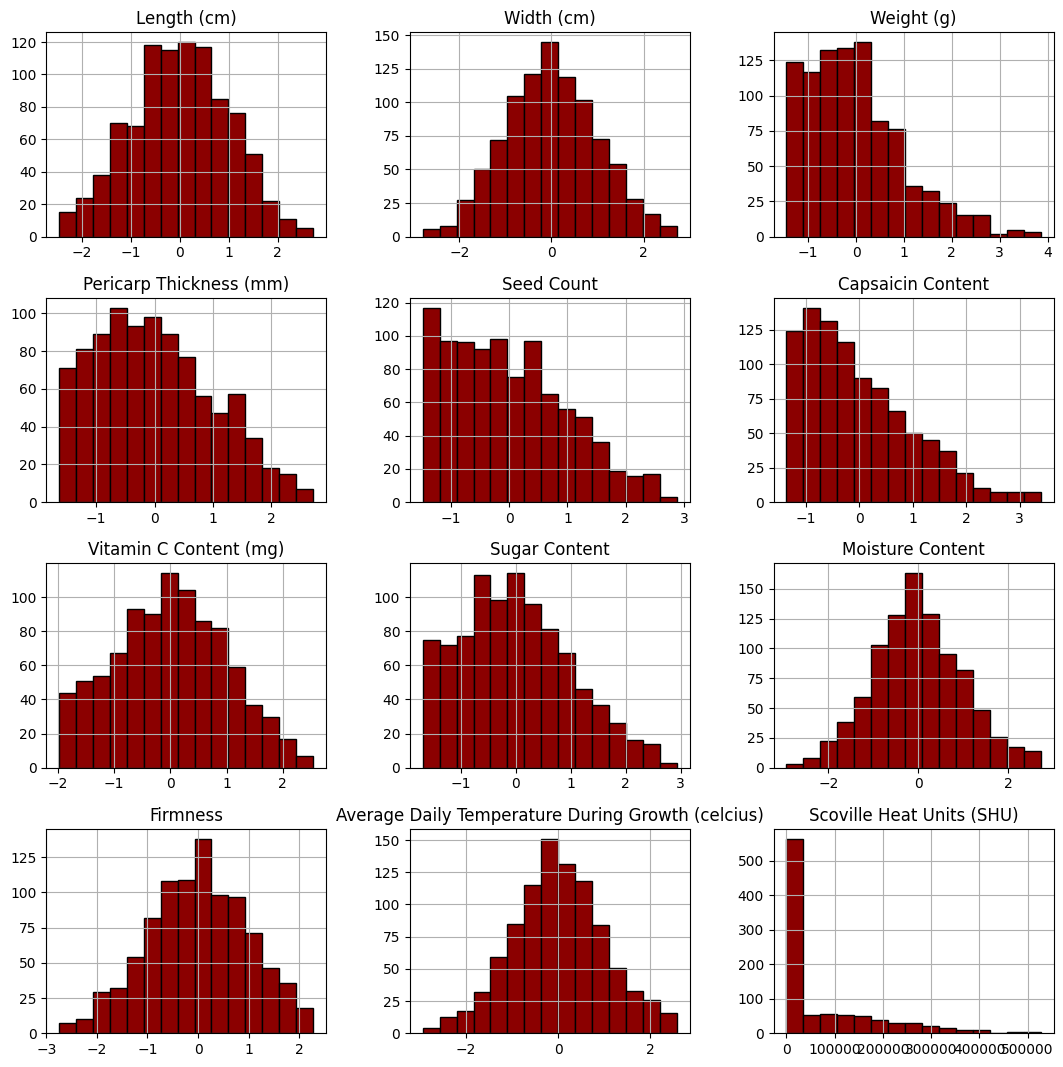

In [87]:
preprocessed_df.hist(figsize=(13,13), 
        bins = 15, color = 'darkred',
        edgecolor='black')

plt.show()

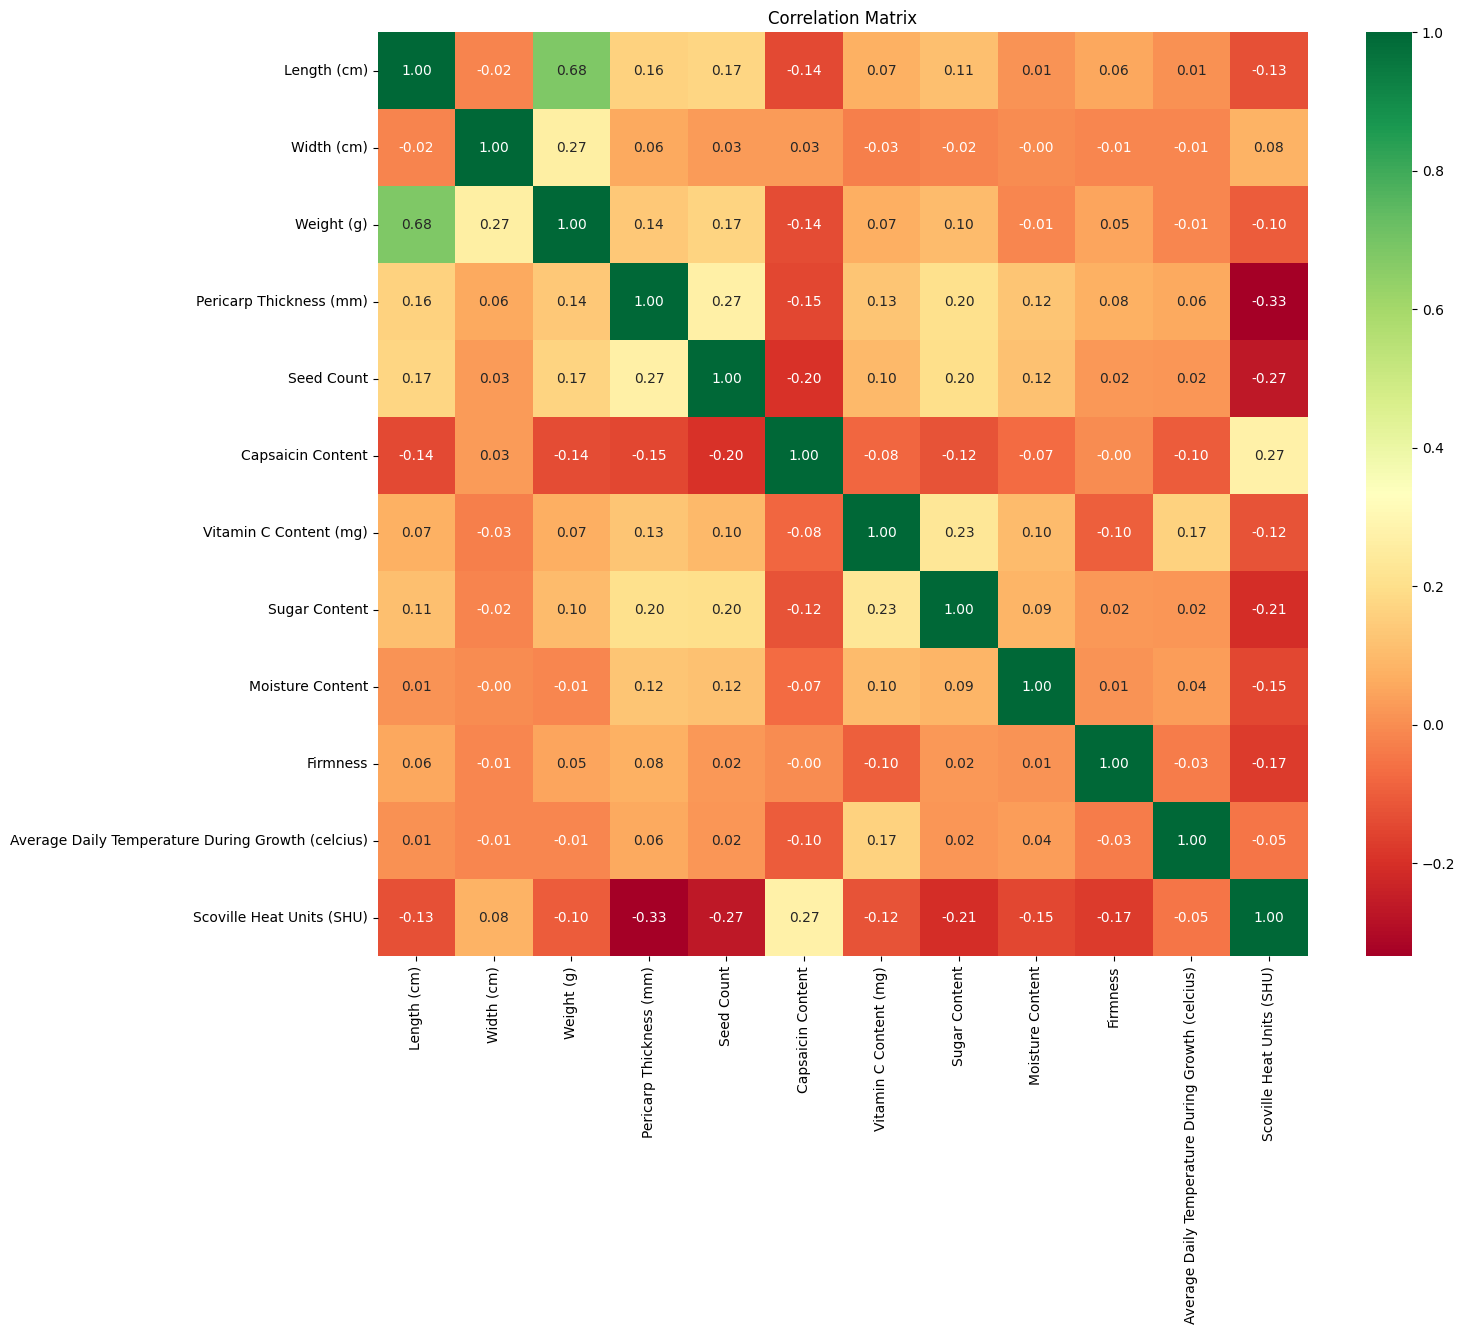

In [88]:
# Correlation matrix
plt.figure(figsize=(15, 12))
sns.heatmap(preprocessed_df.corr(), annot=True, cmap='RdYlGn', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

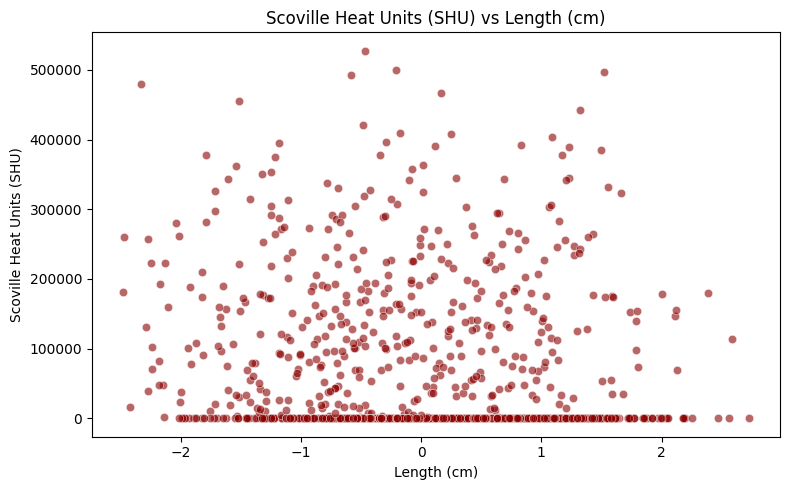

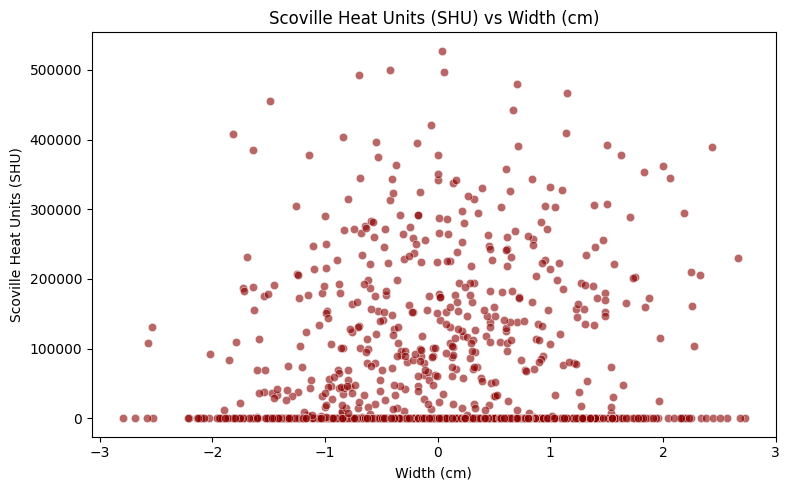

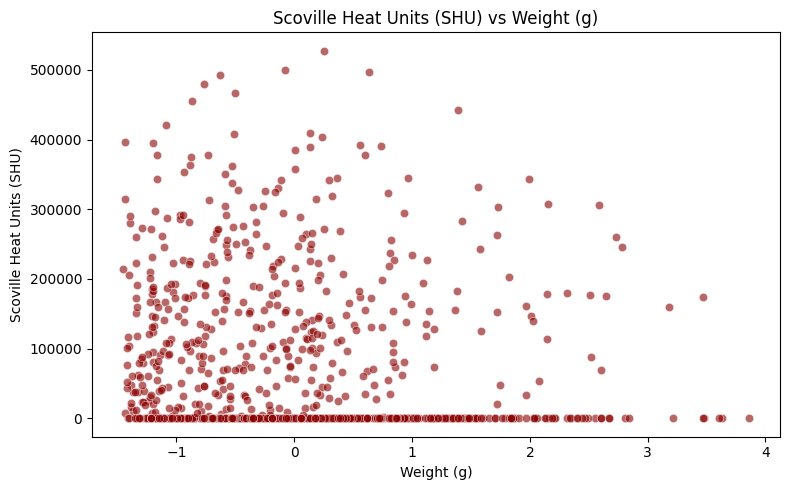

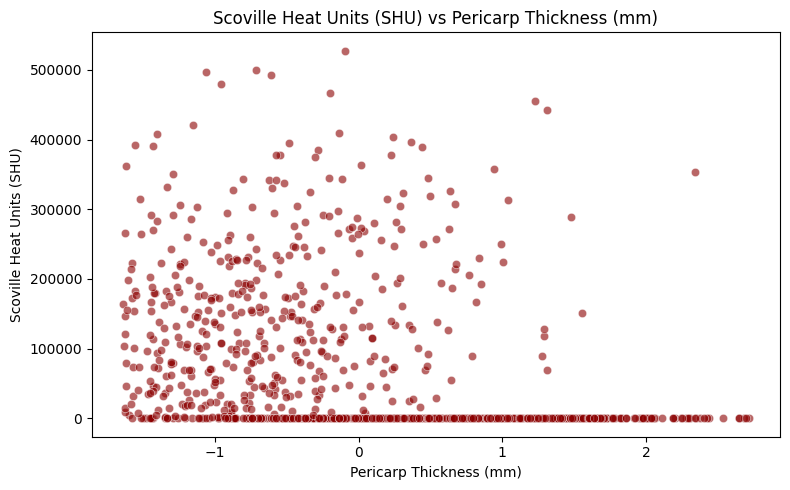

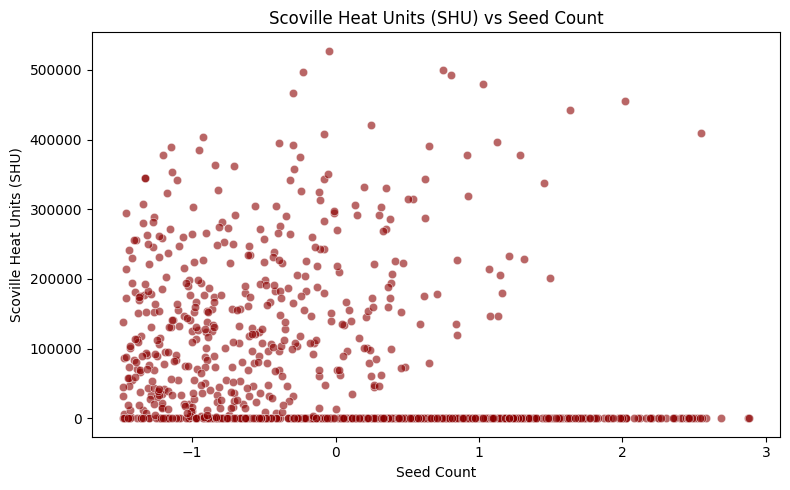

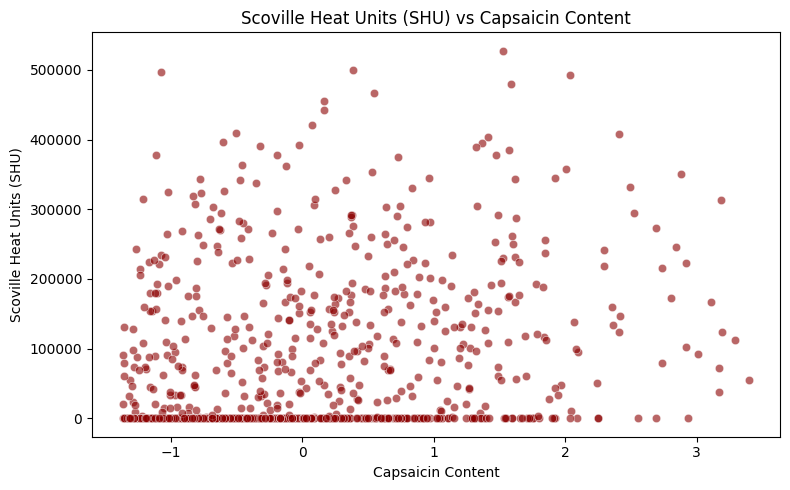

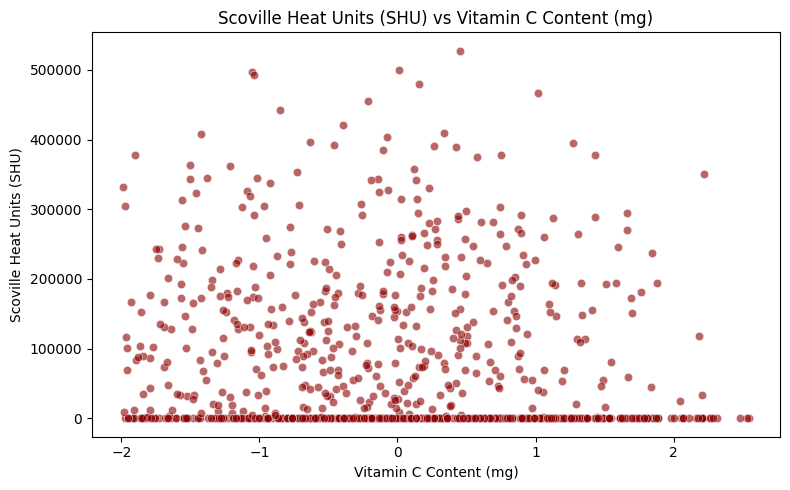

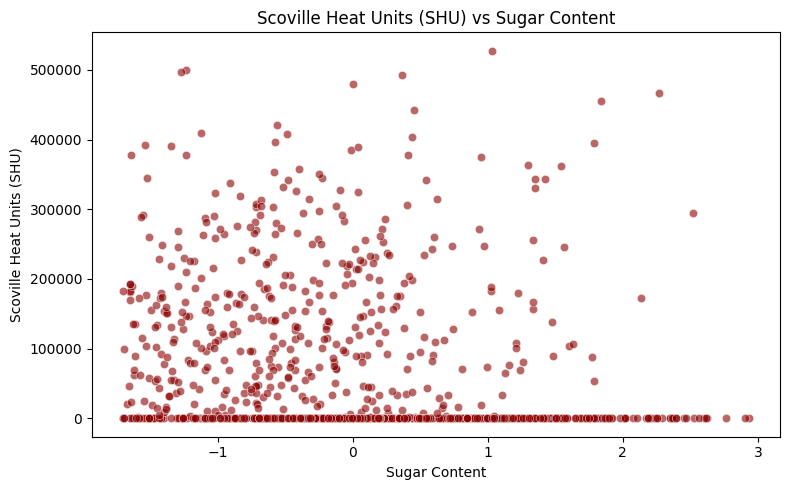

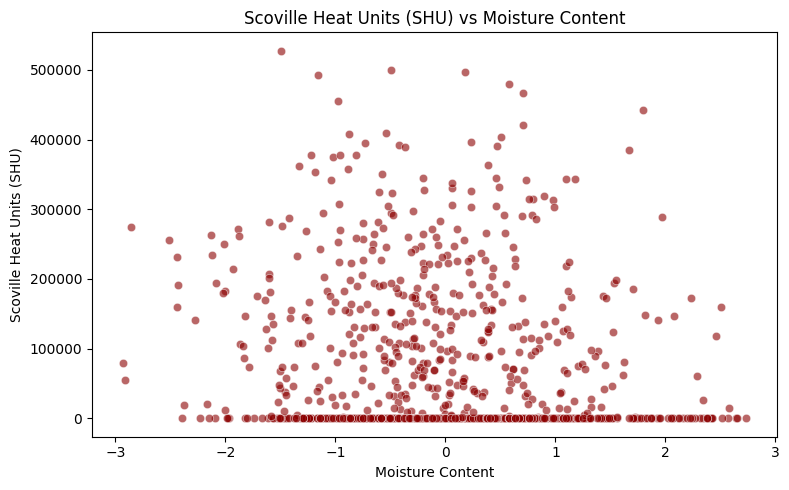

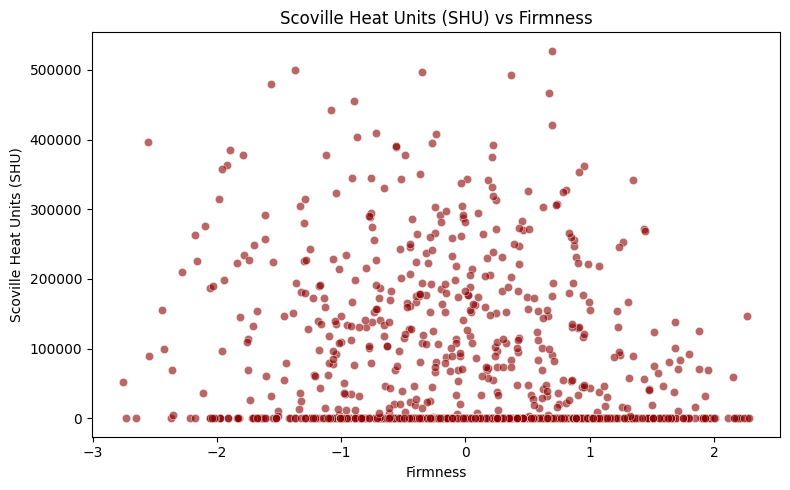

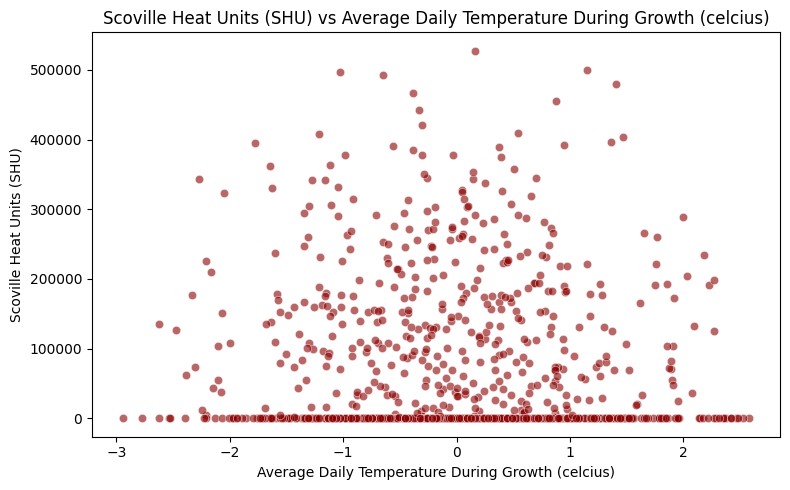

In [89]:
for col in preprocessed_df.drop(target_col, axis = 1).columns:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(
            data=preprocessed_df,
            x=col,
            y=target_col,
            color = 'darkred',
            alpha=0.6)
    plt.title(f'{target_col} vs {col}')
    plt.xlabel(col)
    plt.ylabel(target_col)
    plt.tight_layout()
    plt.show()

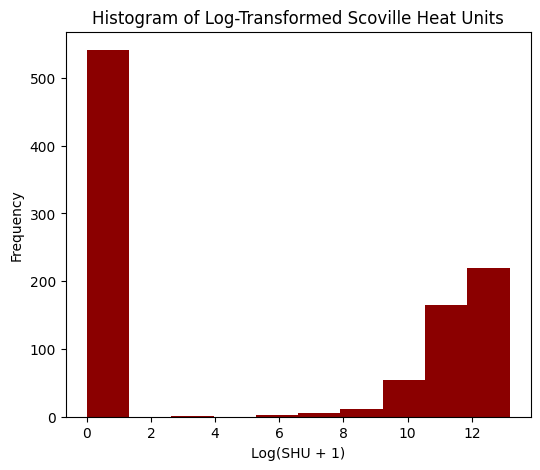

In [90]:
df['log_SHU'] = np.log1p(df['Scoville Heat Units (SHU)'])

plt.figure(figsize=(6,5))
plt.hist(df['log_SHU'], color='darkred')
plt.title('Histogram of Log-Transformed Scoville Heat Units')
plt.xlabel('Log(SHU + 1)')
plt.ylabel('Frequency')
plt.show()

## CHECK TEST DATA

In [91]:
df_test = pd.read_csv('test.csv')
df_test

Length (cm)  Width (cm)  Weight (g)  Pericarp Thickness (mm)  Seed Count  \
0          20.60        6.92       90.98                     3.55        2.25   
1           9.38       11.84      130.67                     0.51        2.92   
2           7.65        3.87       78.76                     8.88      125.27   
3           9.04        7.89      149.76                     5.26      284.68   
4           9.80        6.65      127.25                     1.38      126.19   
..           ...         ...         ...                      ...         ...   
795        11.84        5.98      161.03                     4.57       10.84   
796        16.55       11.89      394.41                     3.80       87.69   
797         9.39        3.32       63.43                     1.77       10.32   
798         7.77        7.50       59.13                     2.70      142.91   
799        20.98        6.84      201.85                     5.83      233.62   

     Capsaicin Content  Vitamin C Content (mg)  Sugar Content  \
0                 0.89                  128.00           6.64   
1                 4.86                  158.31           1.45   
2                 3.55                   96.85           3.80   
3                 3.86                  231.46           4.99   
4                12.60                  174.90           5.33   
..                 ...                     ...            ...   
795               9.97                  186.23           0.55   
796               2.40                  100.54           4.67   
797               2.65                  232.88           2.56   
798               0.24                  126.11           4.51   
799               3.79                  310.55           9.19   

     Moisture Content  Firmness   color Harvest Time  \
0               75.72      4.33     red       Midday   
1              121.15      3.95  yellow       Midday   
2              133.85      3.35  yellow       Midday   
3              109.73      5.50     red       Midday   
4              104.12      1.61     red       Midday   
..                ...       ...     ...          ...   
795            103.35      3.42  yellow       Midday   
796            100.41      3.61     red      Morning   
797             83.58      3.92  yellow       Midday   
798             83.68      3.75   green       Midday   
799            126.47      1.72     red      Evening   

     Average Daily Temperature During Growth (celcius)  \
0                                                28.05   
1                                                18.89   
2                                                15.87   
3                                                19.51   
4                                                23.61   
..                                                 ...   
795                                              21.12   
796                                              17.44   
797                                              21.70   
798                                              22.73   
799                                              22.19   

    Average Temperature During Storage (celcius)  
0                                            7-8  
1                                            NaN  
2                                            NaN  
3                                            NaN  
4                                            NaN  
..                                           ...  
795                                          NaN  
796                                          NaN  
797                                          NaN  
798                                          NaN  
799                                        10-11  

[800 rows x 14 columns]

In [92]:
# Check missing values:
df_test.isna().sum()

Length (cm)                                            2
Width (cm)                                             0
Weight (g)                                             0
Pericarp Thickness (mm)                                0
Seed Count                                             0
Capsaicin Content                                      1
Vitamin C Content (mg)                                 0
Sugar Content                                          0
Moisture Content                                       1
Firmness                                               2
color                                                  0
Harvest Time                                           0
Average Daily Temperature During Growth (celcius)      0
Average Temperature During Storage (celcius)         522
dtype: int64

In [93]:
df_test.duplicated().sum()

np.int64(0)

**Comment**: The preprocessing pipeline then should include the imputation since test data contains missing values as well

**Updates for preprocessing**:

--- For train data ---

- Remove outliers: below quantile(0.001) and above quantile(0.995) for numerical features.

--- For both test and train data ---

- Standardizing

- Drop'Average Temperature During Storage (celsius)' because it has so many missing values.

- Impute missing values with mean of the numeric features and mode for categorical features.

- Categorical features: encode with 'color', 'Harvest Time'

- Impute missing values with mean of the numeric features and mode for categorical features.

- Predict on logarithmic value of Scoville Heat Units(SHU)


In [94]:
# Load train and test data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Use logarithmic value of SHU to train:
train_df['log_SHU'] = np.log1p(train_df['Scoville Heat Units (SHU)'])

# === Step 1: Outlier removal (ONLY for train data) ===
num_features = train_df.select_dtypes(include='number').drop(columns=['Scoville Heat Units (SHU)', 'log_SHU']).columns
cat_features = ['color', 'Harvest Time']

for col in num_features:
    q_low = train_df[col].quantile(0.001)
    q_high = train_df[col].quantile(0.995)
    train_df = train_df[(train_df[col] >= q_low) & (train_df[col] <= q_high)]

# === Step 2: Drop column from both train and test ===
DROP_COLS = ['Average Temperature During Storage (celcius)']
train_df = train_df.drop(columns=DROP_COLS, errors='ignore')
test_df = test_df.drop(columns=DROP_COLS, errors='ignore')


# === Step 4: Column transformers ===

# Numeric preprocessing: impute + scale
num_preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Categorical preprocessing: impute + encode
cat_preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing
preprocessor = ColumnTransformer(transformers=[
    ('num', num_preprocessor, num_features),
    ('cat', cat_preprocessor, cat_features)
])

In [95]:
# Train/test split
X = train_df.drop(columns=['Scoville Heat Units (SHU)', 'log_SHU'])
y = train_df['log_SHU']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### (A) Regression Analysis

In [96]:
# Function to tune parameters for each regressor:
def evaluate_model(name, model, param_grid):
    print(f"\n Grid Search for {name}")
    
    pipe = Pipeline ([
        ('preprocess', preprocessor),
        ('regressor', model)
    ])
    
    # Adjust param grid to reflect the pipeline's step name
    param_grid = {f'regressor__{key}': val for key, val in param_grid.items()}

    grid = GridSearchCV(pipe, param_grid=param_grid, cv=5,
                        scoring='neg_mean_squared_error', n_jobs=-1)
    grid.fit(X_train, y_train) 

    best_model = grid.best_estimator_
    y_pred_log = best_model.predict(X_test)
    y_pred = np.expm1(y_pred_log)
    y_true = np.expm1(y_test)

    mae = mean_absolute_error(y_true, y_pred)


    print(f"Best Params: {grid.best_params_}")
    print(f"MAE: {mae:.2f}")
    
    plt.figure(figsize=(6, 6))
    plt.scatter(y_true, y_pred, alpha=0.7)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"{name}: Actual vs Predicted")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    return best_model


 Grid Search for Linear Regression
Best Params: {}
MAE: 77244.28


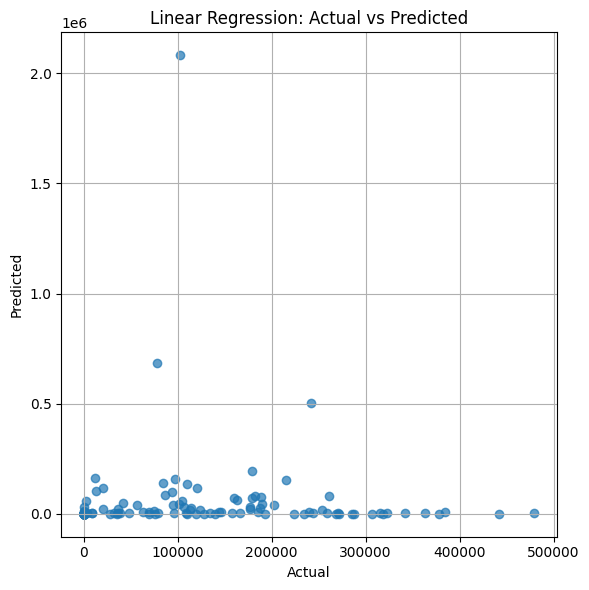


 Grid Search for Ridge Regression
Best Params: {'regressor__alpha': 10}
MAE: 75957.25


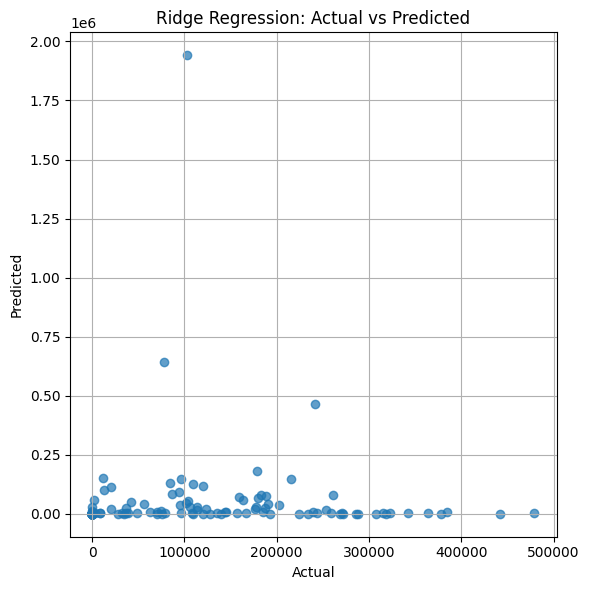


 Grid Search for Lasso Regression
Best Params: {'regressor__alpha': 0.1}
MAE: 66732.07


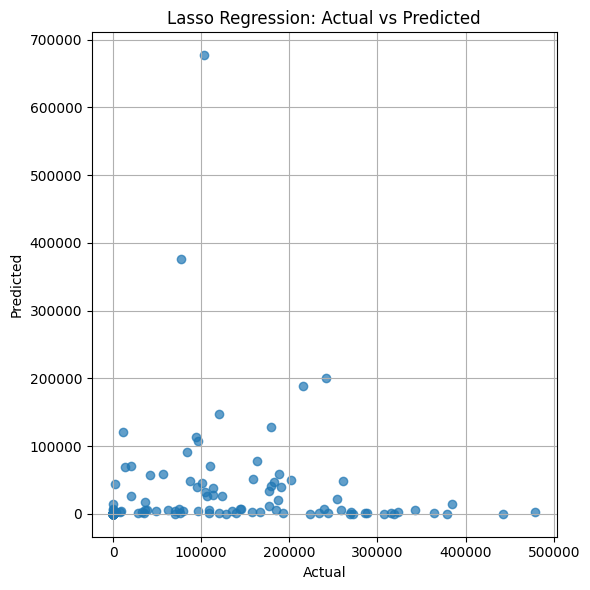


 Grid Search for Decision Tree
Best Params: {'regressor__max_depth': 3}
MAE: 65702.83


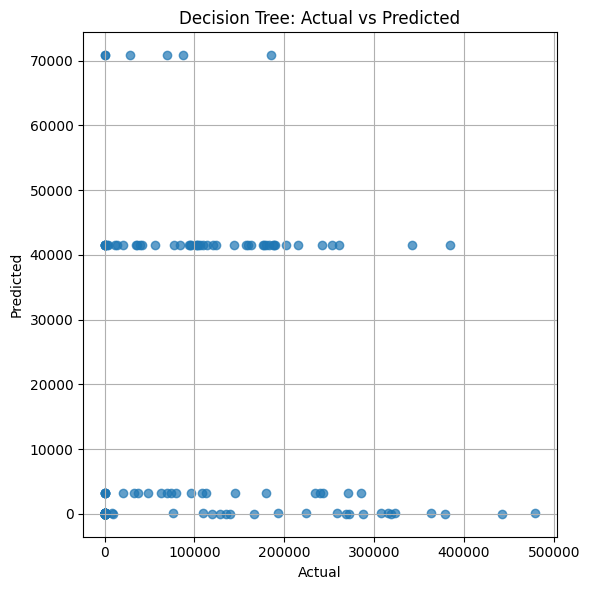


 Grid Search for Random Forest
Best Params: {'regressor__max_depth': 10, 'regressor__n_estimators': 50}
MAE: 60718.35


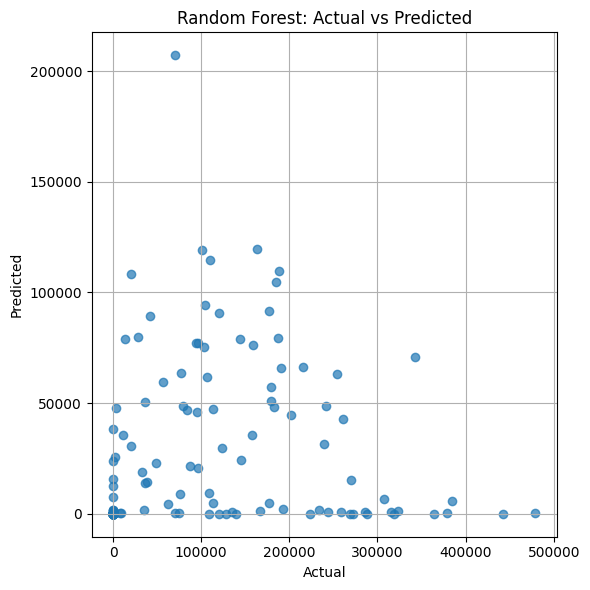


 Grid Search for Gradient Boosting
Best Params: {'regressor__learning_rate': 0.1, 'regressor__max_depth': 3, 'regressor__n_estimators': 50}
MAE: 60000.42


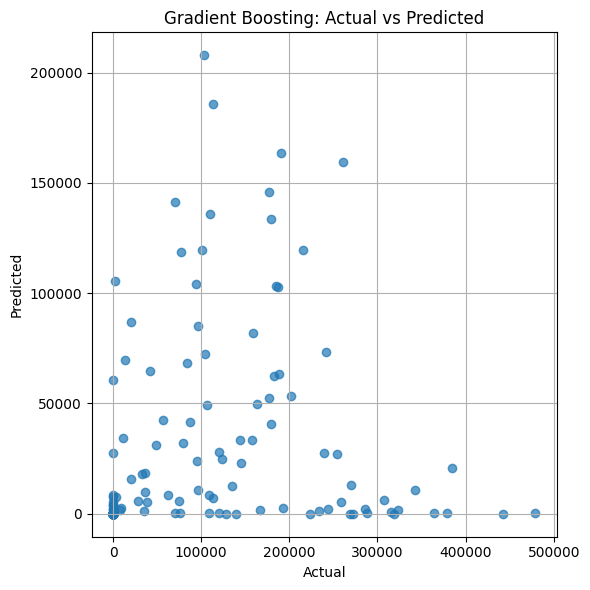


 Grid Search for Support Vector Regressor
Best Params: {'regressor__C': 1, 'regressor__kernel': 'rbf'}
MAE: 68622.20


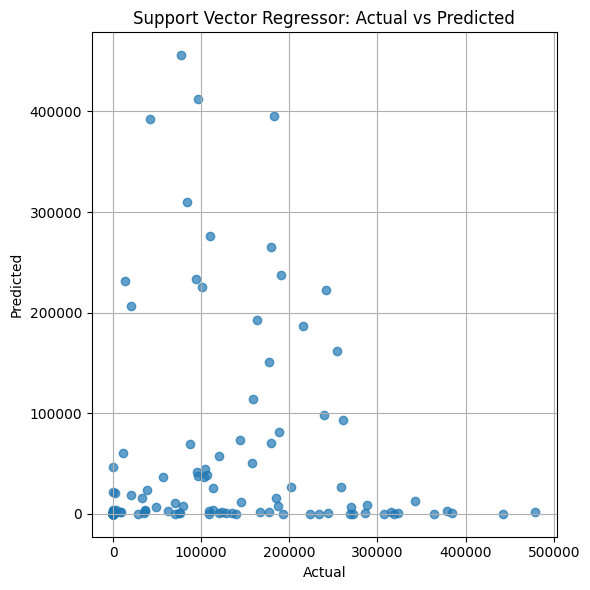

In [97]:
# 1. Linear Regression
lr_model = evaluate_model("Linear Regression", LinearRegression(), {})

# 2. Ridge Regression
ridge_model = evaluate_model("Ridge Regression", Ridge(), {'alpha': [0.01, 0.1, 1, 10]})

# 3. Lasso Regression
lasso_model = evaluate_model("Lasso Regression", Lasso(), {'alpha': [0.01, 0.1, 1, 10]})

# 4. Decision Tree
dt_model = evaluate_model("Decision Tree", DecisionTreeRegressor(random_state=42), {
    'max_depth': [3, 5, 10, None]
})

# 5. Random Forest
rf_model = evaluate_model("Random Forest", RandomForestRegressor(random_state=42), {
    'n_estimators': [50, 100],
    'max_depth': [None, 10]
})

# 6. Gradient Boosting
gb_model = evaluate_model("Gradient Boosting", GradientBoostingRegressor(random_state=42), {
    'n_estimators': [50, 100],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
})

# 7. Support Vector Regressor
svr_model = evaluate_model("Support Vector Regressor", SVR(), {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
})


 Grid Search for PCR
Best Params: {'regressor__pca__n_components': 0.9}
MAE: 73041.71


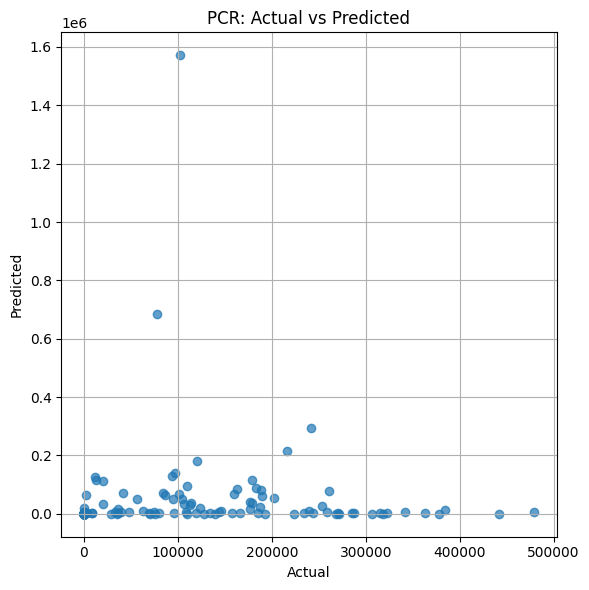

In [98]:
# Principal Component Regression (PCR)
pcr_model = Pipeline([
    ('pca', PCA()),
    ('ridge', Ridge(alpha = 10))
])
param_grid = {
    'pca__n_components': [0.9, 0.95, 0.98]
}
pcr_model= evaluate_model("PCR", pcr_model, param_grid)



 Grid Search for ElasticNet
Best Params: {'regressor__alpha': 0.1, 'regressor__l1_ratio': 0.5}
MAE: 68335.90


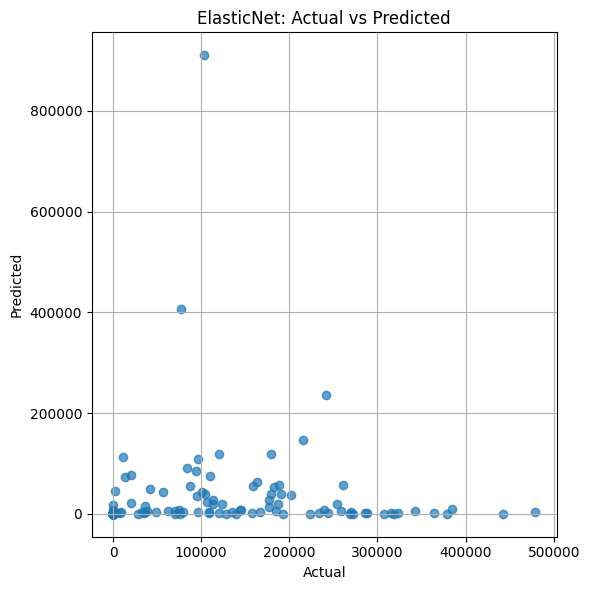

In [99]:
# Elastic Net Regressor
elastic_params = {'alpha': [0.1, 1.0], 
                  'l1_ratio': [0.2, 0.5, 0.8]}
elastic_model = evaluate_model("ElasticNet", ElasticNet(), elastic_params)

In [100]:
shu_pred = elastic_model.predict(test_df)
shu_pred = np.expm1(shu_pred)
y_test_kaggle = pd.DataFrame(shu_pred, columns=["Scoville Heat Units (SHU)"])
y_test_kaggle.index.name = "index"
y_test_kaggle[['Scoville Heat Units (SHU)']].to_csv("kaggle2.csv")

## (B)  Multi-class classification analysis with an ensemble classifier.

In [101]:
# Define bin count
num_bins = 6 
y_binned = pd.qcut(y, q=num_bins, labels=False, duplicates='drop')

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y_binned, test_size=0.2, random_state=42
)

clf_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

param_grid_rf = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [5, 10]
}

grid_clf = GridSearchCV(clf_pipeline, param_grid=param_grid_rf, 
                        cv=5, scoring='f1_macro', n_jobs=-1)

grid_clf.fit(X_train, y_train)

print('Best Hyperparameters:', grid_clf.best_params_)

Best Hyperparameters: {'classifier__max_depth': 10, 'classifier__n_estimators': 100}



 Accuracy Score: 0.6666666666666666

 Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.95      0.82       120
           1       0.46      0.18      0.26        33
           2       0.29      0.12      0.17        33

    accuracy                           0.67       186
   macro avg       0.49      0.42      0.42       186
weighted avg       0.60      0.67      0.60       186



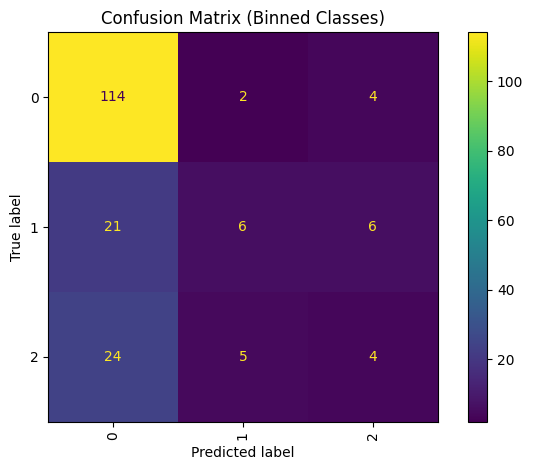

In [102]:
y_pred = grid_clf.predict(X_test)

print('\n Accuracy Score:', accuracy_score(y_test, y_pred))
print('\n Classification Report:\n', classification_report(y_test, y_pred))

# Optional: Confusion matrix plot
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, xticks_rotation='vertical')
plt.title('Confusion Matrix (Binned Classes)')
plt.tight_layout()
plt.show()

In [103]:
# Effect of Bin Count on Accuracy
for bins in [3, 5, 7, 10]:
    y_binned_temp = pd.qcut(y, q=bins, labels=False, duplicates='drop')
    scores = cross_val_score(clf_pipeline, X, y_binned_temp, cv=5, scoring='accuracy')
    print(f"  {bins} bins → Accuracy: {np.mean(scores):.4f}")

  3 bins → Accuracy: 0.7473
  5 bins → Accuracy: 0.6630
  7 bins → Accuracy: 0.6371
  10 bins → Accuracy: 0.6069


In [104]:
# Re-create bin labels for training data
y_binned = pd.qcut(y, q=num_bins, labels=False, duplicates='drop')
bin_intervals = pd.qcut(y, q=num_bins, duplicates='drop').dtype.categories
bin_midpoints_log = [interval.mid for interval in bin_intervals]
bin_midpoints_shu = [np.expm1(mid) for mid in bin_midpoints_log]

# Predict bins for test data
y_pred_bins = grid_clf.predict(df_test)

# Convert predicted bins back to SHU midpoints
y_pred_shu = [bin_midpoints_shu[int(bin_label)] for bin_label in y_pred_bins]


# Save for submission or evaluation
y_test_kaggle = pd.DataFrame(y_pred_shu, columns=["Scoville Heat Units (SHU)"])
y_test_kaggle.index.name = "index"
y_test_kaggle.to_csv("kaggle.csv")

**Comment**: 



As the number of bins decreases (e.g., from 10 to 3), classification accuracy tends to increase. This is because it's easier for the classifier to correctly predict broader categories. For example, since a large portion of the dataset consists of peppers with a SHU of 0, the classifier can perform well simply by assigning many samples to the first bin (which includes 0). This boosts accuracy but oversimplifies the predictions.


However, when we convert bin predictions back into SHU values (e.g., using the midpoint of each interval), this coarse binning becomes problematic. If the first bin covers a wide range, say SHU 0 to 1600, and its midpoint is around 800, then all predictions in that bin are assigned ~800 — even though many actual values are 0. This creates large errors in SHU estimation (e.g., MAE or MSE).


Using more bins creates finer granularity, allowing the model to make more precise distinctions between SHU ranges. This reduces the error when mapping bins back to SHU values. However, as the number of bins increases too much (e.g., beyond 100), bins may become too narrow, class imbalance increases, and the classifier may struggle. As a result, SHU prediction error (e.g., on Kaggle) stops improving significantly beyond a certain point.

## (C) A two-step analysis (two sequential pipelines).

In [105]:
# Create classificable target: SHU > 0 -> 1 (spicy) or 0 (not spicy)
train_df['is_spicy'] = (train_df['Scoville Heat Units (SHU)'] > 0).astype(int)
print(train_df['is_spicy'].value_counts())


is_spicy
0    495
1    431
Name: count, dtype: int64


**Comment**: The class propoortion is not the same as in EDA because we have removed some outliers.

In [106]:
# Step 1: Classfication Pipeline
clf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

features = num_features.to_list() + cat_features
# Train classifier on the full train data
clf_pipeline.fit(train_df[features], train_df['is_spicy'])

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Length (cm)', 'Width (cm)', 'Weight (g)', 'Pericarp Thickness (mm)',
       'Seed Count', 'Capsaicin Content', 'Vitamin C Content (mg)',
       'Sugar Content', 'Moisture Content', 'Firmness',
       'Average Daily Temperature During Growth (celcius)'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['color', 'Harvest Time'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [107]:
# Step 2: Regression Pipeline
spicy_only = train_df[train_df['is_spicy'] == 1]

reg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

reg_pipeline.fit(spicy_only[features], spicy_only['log_SHU'])

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Length (cm)', 'Width (cm)', 'Weight (g)', 'Pericarp Thickness (mm)',
       'Seed Count', 'Capsaicin Content', 'Vitamin C Content (mg)',
       'Sugar Content', 'Moisture Content', 'Firmness',
       'Average Daily Temperature During Growth (celcius)'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['color', 'Harvest Time'])])),
                ('regressor', LinearRegression())])

In [108]:
# Predict Spicy Pepper or Not on test data
is_spicy_pred = clf_pipeline.predict(test_df[features])

# Predict SHU for Spicy Predictions
log_shu_spicy = reg_pipeline.predict(test_df[features][is_spicy_pred == 1])
shu_spicy = np.expm1(log_shu_spicy)

In [109]:
# Merge classification and Regression Results
final_shu = np.zeros(len(test_df))  
final_shu[is_spicy_pred == 1] = shu_spicy
submission_c = pd.DataFrame({
    'index': test_df.index,
    'Scoville Heat Units (SHU)': final_shu
})
submission_c.to_csv("kaggle_c.csv", index=False)

**Comment**: Pipeline C scored the lowest MAE on Kaggle, which is our best model for now. 

In [111]:
# Predict whether each sample is spicy (1) or not (0)
y_spicy_pred = clf_pipeline.predict(X_test)

# Select only spicy samples
X_test_spicy = X_test[y_spicy_pred == 1]
y_test_spicy = y_test[y_spicy_pred == 1]

# Predict log(SHU + 1) for spicy samples, then convert back
log_y_pred = reg_pipeline.predict(X_test_spicy)
y_pred = np.expm1(log_y_pred)
y_true = np.expm1(y_test_spicy)

# Calculate MAE
mae = mean_absolute_error(y_true, y_pred)
print("MAE on spicy peppers:", mae)


MAE on spicy peppers: 81759.13640106648


**Comment**: This scored around 62427.9 on Kaggle so we could say the model perform pretty well on the unseen data.